In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Data Analisis
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from imblearn.over_sampling import SMOTE, RandomOverSampler

# Data Visualisasi
import plotly.express as px

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost.sklearn import XGBClassifier   

# metric
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import KBinsDiscretizer

from imblearn.over_sampling import SMOTE

# **Telco Company**

## **Background**

Telco Company merupakan penyedia layanan telekomunikasi yang beroperasi di tengah persaingan industri yang semakin ketat. Dalam konteks persaingan tersebut, keberhasilan perusahaan tidak hanya ditentukan oleh kemampuan menarik pelanggan baru, tetapi juga oleh strategi dalam mempertahankan pelanggan yang sudah ada. Salah satu permasalahan yang sering muncul dalam industri telekomunikasi adalah churn pelanggan, yaitu kondisi ketika pelanggan memutuskan berhenti berlangganan layanan. Fenomena ini perlu mendapat perhatian khusus karena tingginya churn dapat menurunkan jumlah pelanggan secara signifikan.

Churn pelanggan menjadi isu yang serius karena biaya akuisisi pelanggan baru umumnya lebih tinggi dibandingkan dengan biaya mempertahankan pelanggan lama. Selain itu, pelanggan yang telah berlangganan dalam jangka waktu panjang biasanya memiliki nilai customer lifetime value (CLV) yang lebih besar. Dengan demikian, kehilangan pelanggan lama berpotensi menimbulkan kerugian yang tidak hanya berdampak pada pendapatan jangka pendek, tetapi juga pada keberlanjutan bisnis perusahaan dalam jangka panjang. Oleh karena itu, memahami faktor-faktor yang memengaruhi churn pelanggan merupakan langkah strategis yang penting.

Telco Company memiliki data pelanggan yang cukup komprehensif, yang mencakup variabel-variabel seperti lama berlangganan (tenure), jenis kontrak, metode pembayaran, tagihan bulanan, hingga total pembayaran. Data ini dapat memberikan gambaran mengenai pola perilaku pelanggan sekaligus menjadi dasar dalam menganalisis kecenderungan churn. Dengan memanfaatkan data historis tersebut, perusahaan dapat mengembangkan pendekatan analitis yang lebih tepat, misalnya melalui penerapan machine learning, untuk memprediksi churn dan merancang strategi retensi pelanggan yang lebih efektif.

## **Business Problem**

Telco Company menghadapi tantangan besar berupa tingginya tingkat churn pelanggan, yaitu kondisi di mana pelanggan berhenti menggunakan layanan telekomunikasi perusahaan. Jika churn tidak dapat dikendalikan, maka perusahaan akan kehilangan sumber pendapatan yang stabil sekaligus harus mengeluarkan biaya lebih besar untuk memperoleh pelanggan baru. Rata-rata biaya akuisisi pelanggan baru bahkan dapat mencapai $200 per pelanggan, yang meliputi berbagai komponen seperti biaya pemasangan iklan dan promosi, diskon awal berlangganan, komisi tenaga penjualan, hingga biaya operasional onboarding pelanggan baru. Artinya, setiap kali perusahaan kehilangan satu pelanggan lama, perusahaan tidak hanya kehilangan pendapatan berulang (recurring revenue), tetapi juga harus menanggung biaya tambahan yang cukup besar untuk menarik pelanggan pengganti.

Selama ini, Telco Company cenderung bersifat reaktif, yaitu baru mengetahui churn setelah pelanggan langsung berhenti berlangganan tanpa terlebih dahulu menghubungi customer service. Pola ini membuat perusahaan kehilangan kesempatan untuk melakukan tindakan pencegahan. Padahal, data historis pelanggan yang dimiliki Telco Company (seperti lama berlangganan, jenis kontrak, metode pembayaran, dan tagihan bulanan) sebenarnya dapat dimanfaatkan untuk memprediksi potensi churn lebih dini.

Alur flow bisnis sebelum adanya pemanfaatan machine learning dapat digambarkan sebagai berikut:

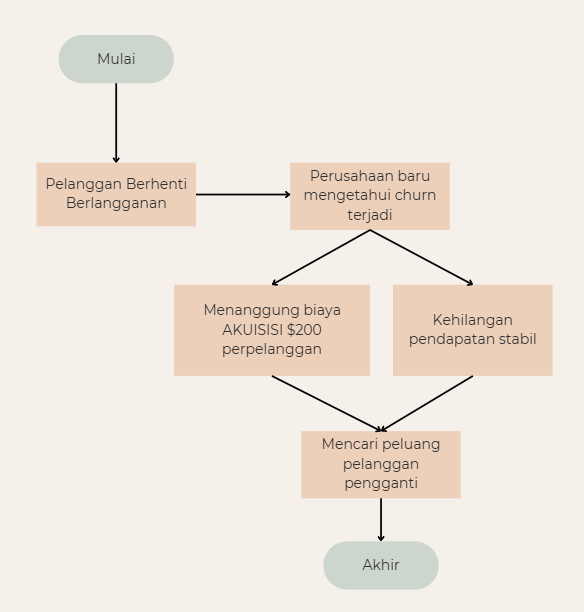


Dari permasalahan bisnis dan alur proses di atas, terlihat jelas bahwa perusahaan selama ini hanya bersifat reaktif dalam menangani churn. Agar dapat mengambil langkah yang lebih proaktif, diperlukan analisis lebih lanjut untuk menjawab pertanyaan-pertanyaan berikut:

- Segmen pelanggan mana yang paling berisiko melakukan churn, dan karakteristik apa yang membedakan mereka dengan pelanggan yang loyal?

- Bagaimana cara memprediksi pelanggan yang berpotensi churn lebih awal dengan memanfaatkan data historis pelanggan, sehingga perusahaan dapat mengurangi potensi kehilangan pendapatan dan menekan biaya akuisisi pelanggan baru?

Sehubungan dengan hal tersebut, penelitian ini akan menggunakan F3-score sebagai metrik evaluasi utama. F3-score dipilih karena metrik ini menggabungkan precision dan recall, dengan memberikan bobot yang lebih besar pada recall. Dengan demikian, metrik ini tidak hanya menekankan kemampuan model dalam mengenali sebanyak mungkin pelanggan yang benar-benar berpotensi churn, tetapi juga tetap mempertimbangkan tingkat kesalahan prediksi terhadap pelanggan loyal.

Dalam konteks bisnis, hal ini sangat relevan karena kegagalan dalam mendeteksi pelanggan yang berisiko churn akan membuat perusahaan benar-benar kehilangan pelanggan beserta pendapatannya, sehingga recall harus lebih diprioritaskan. Namun, F3-score juga menjaga agar prediksi tidak terlalu bias dengan menganggap semua pelanggan sebagai churn, sehingga perusahaan tetap dapat mengontrol biaya tambahan akibat pemberian promosi atau program retensi yang salah sasaran.

## **Goals For Analysis**

Perusahaan dapat memahami segmen pelanggan yang memiliki risiko churn paling tinggi serta mengidentifikasi karakteristik yang membedakan mereka dengan pelanggan yang loyal. Dengan pemahaman ini, perusahaan mampu merancang strategi retensi yang lebih terarah, sehingga tidak hanya menekan tingkat churn, tetapi juga meningkatkan kepuasan dan loyalitas pelanggan dalam jangka panjang.

## **Business Flow After Machine Learning & Goals**



### **Business Flow After Machine Learning**

Setelah menerapkan machine learning, Telco Company dapat memanfaatkan data historis pelanggan untuk membangun model prediksi churn. Proses ini dimulai dengan pengolahan data pelanggan yang mencakup variabel-variabel seperti lama berlangganan, jenis kontrak, metode pembayaran, serta tagihan bulanan. Model prediksi yang dihasilkan kemudian digunakan untuk mengidentifikasi pelanggan yang memiliki risiko tinggi untuk menghentikan langganan.

Berdasarkan hasil prediksi tersebut, tim bisnis dapat segera melakukan intervensi yang bersifat preventif. Misalnya, pelanggan yang terdeteksi berisiko dapat diberikan bonus kuota internet tambahan dengan estimasi biaya rata-rata sekitar US$10 untuk setiap pelanggan, atau berupa diskon pada tagihan bulanan dengan estimasi biaya sekitar US$50 per pelanggan. Intervensi ini dijalankan sebagai bagian dari strategi retensi pelanggan agar risiko churn dapat ditekan sedini mungkin.

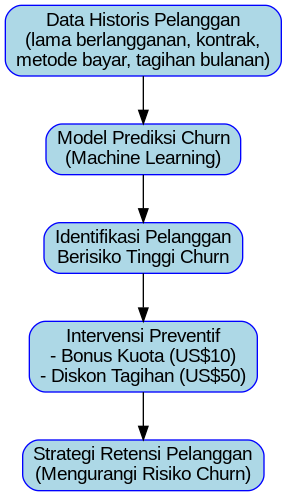

### **Goals for Machine Learning**

Perusahaan dapat membangun sistem prediksi churn berbasis data historis pelanggan, sehingga potensi kehilangan pelanggan dapat diidentifikasi sejak dini. Dengan adanya model ini, perusahaan memiliki kesempatan untuk melakukan intervensi lebih cepat dan tepat sasaran, sehingga tidak hanya mampu menjaga stabilitas pendapatan, tetapi juga mengurangi biaya akuisisi pelanggan baru serta meningkatkan efektivitas strategi retensi dalam jangka panjang.

## **Stakeholders : Tim Marketing & Customer Retention**

Tim Marketing & Customer Retention berperan penting dalam memanfaatkan hasil prediksi churn. Informasi mengenai pelanggan yang berisiko berhenti berlangganan akan membantu mereka menyusun strategi kampanye promosi dan program loyalitas yang lebih tepat sasaran. Dengan adanya dukungan model prediksi, tim dapat menargetkan penawaran khusus hanya kepada pelanggan yang benar-benar membutuhkan, sehingga penggunaan anggaran promosi menjadi lebih efisien sekaligus meningkatkan efektivitas program retensi pelanggan.

## **Metric Evaluation**
- Business Metric
    - Acquisition Cost (AC) = $200
    - Retention Cost (RC) = $60
    - Kehilangan pelanggan (FN) merugikan lebih besar dibanding salah mengintervensi pelanggan yang tidak akan churn (FP).
- Type 1 Error (False Positive)
    - Prediksi churn, tapi pelanggan sebenarnya bertahan.
    - Biaya = Retention Cost = $60 per pelanggan.
    - Implikasi: Terjadi pemborosan biaya retensi.
- Type 2 Error (False Negative)
    - Prediksi bertahan, tapi pelanggan sebenarnya churn.
    - Biaya = Acquisition Cost = $200 per pelanggan.
    - Implikasi: Kehilangan pendapatan lebih besar, harus mengeluarkan biaya akuisisi baru.

- Metric Selection
    - Biaya kehilangan pelanggan (False Negative = $200) jauh lebih besar dibandingkan biaya intervensi yang salah (False Positive = $60). Artinya, jika sistem prediksi gagal mendeteksi pelanggan yang akan churn dan menganggap mereka akan bertahan, perusahaan tidak hanya kehilangan pelanggan tersebut, tetapi juga harus mengeluarkan biaya akuisisi baru untuk menggantikan pelanggan yang hilang. Biaya ini jauh lebih tinggi dibandingkan dengan biaya retensi untuk pelanggan yang sebenarnya tidak akan churn, di mana hanya terjadi pemborosan sumber daya.

## **Terminologi**

- Churn : kondisi di mana pelanggan lama berhenti berlangganan. Pelanggan akan dihitung churn saat ia berhenti menggunakan layanan selama 30 hari berturut-turut dan tidak melakukan perpanjangan kontrak atau pembayaran pada periode berikutnya. 

- Tenure : Ini dipakai untuk mengukur loyalitas pelanggan serta menganalisis hubungan antara lamanya berlangganan dengan kemungkinan pelanggan melakukan churn dengan satuan per tahun.

- MonthlyCharges : Biaya berlangganan bulanan yang harus dibayar pelanggan. Istilah ini dipakai di billing/perhitungan keuangan dengan dolar us sebagai cara pembayaranya.

- TotalCharges : Akumulasi seluruh pembayaran pelanggan sejak pertama kali berlangganan yang dilakukan dalam pembayaran berupa us dolar.

- Contract : Jenis kontrak yang dipilih pelanggan (misalnya bulanan, 1 tahun, 2 tahun). Ini istilah bisnis karena berhubungan dengan strategi retensi pelanggan.

- PaymentMethod : Cara pelanggan melakukan pembayaran (kartu kredit, transfer bank, cek, dll).

- PaperlessBilling : Apakah pelanggan menggunakan tagihan elektronik atau tagihan fisik (kertas).

## **Load Dataset**

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **Data Understanding**

**Column Description**

- `customerID`       :  Identitas unik bagi setiap pelanggan yang berfungsi sebagai pembeda antar pelanggan, namun tidak digunakan dalam analisis prediksi.

- `gender`           :  Menunjukkan jenis kelamin pelanggan, yaitu laki-laki atau perempuan.

- `SeniorCitizen`    :  Menunjukkan status apakah pelanggan merupakan warga senior, di mana nilai 0 berarti bukan senior dan nilai 1 berarti senior.

- `Partner`          : Menggambarkan apakah pelanggan memiliki pasangan atau tidak.

- `Dependents `      : Menjelaskan apakah pelanggan memiliki tanggungan keluarga seperti anak atau anggota keluarga lain.

- `tenure`           : Berisi informasi lama pelanggan berlangganan dalam hitungan bulan, yang dapat mencerminkan tingkat loyalitas.

- `PhoneService`     : Menunjukkan apakah pelanggan menggunakan layanan telepon rumah.

- `MultipleLines`    : Menjelaskan apakah pelanggan memiliki lebih dari satu jalur telepon.

- `InternetService`  : Berisi jenis layanan internet yang digunakan pelanggan, seperti DSL, fiber optic, atau tidak berlangganan internet.

- `OnlineSecurity`   : Menunjukkan apakah pelanggan menggunakan layanan keamanan online tambahan.

- `OnlineBackup`     : Menjelaskan apakah pelanggan menggunakan layanan cadangan data secara online.

- `DeviceProtection` : Menunjukkan apakah pelanggan berlangganan layanan perlindungan perangkat.

- `TechSupport`      : Menjelaskan apakah pelanggan mendapatkan dukungan teknis tambahan.

- `StreamingTV`      : Menunjukkan apakah pelanggan menggunakan layanan televisi streaming.

- `StreamingMovies`  : Menunjukkan apakah pelanggan menggunakan layanan film streaming.

- `Contract`         : Menggambarkan jenis kontrak yang dipilih pelanggan, yaitu bulanan, satu tahun, atau dua tahun.

- `PaperlessBilling` : Menjelaskan apakah pelanggan menggunakan sistem tagihan elektronik.

- `PaymentMethod`    : Menunjukkan metode pembayaran yang digunakan pelanggan, seperti cek elektronik, cek pos, transfer bank otomatis, atau kartu kredit otomatis.

- `MonthlyCharges`   : Merisi jumlah biaya yang harus dibayarkan pelanggan setiap bulan.

- `TotalCharges`     : Merupakan total biaya yang telah dikeluarkan pelanggan selama berlangganan.

- `Churn`            : Variabel target yang menunjukkan apakah pelanggan berhenti berlangganan (Yes) atau tetap menggunakan layanan (No).

**Cek Tipe Data**

Cek Tipe Data adalah langkah untuk mengetahui dan memverifikasi jenis data pada setiap kolom dalam dataset. Dengan pengecekan ini kita bisa membedakan apakah variabel bersifat numerik, kategorikal, teks, atau tanggal/waktu. Informasi ini penting agar analisis dan transformasi data berjalan benar, serta menentukan metode statistik atau algoritma machine learning yang sesuai.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Secara keseluruhan, dataset ini terdiri atas 21 kolom dengan variasi tipe data yang berbeda, yaitu 2 kolom bertipe data integer yang umumnya merepresentasikan data numerik diskrit, 1 kolom bertipe data float yang menggambarkan data numerik kontinu, serta 18 kolom bertipe data object yang sebagian besar berisi informasi kategorikal seperti jenis layanan, metode pembayaran, maupun status pelanggan, sehingga menunjukkan bahwa dataset ini memiliki kombinasi antara variabel numerik dan kategorikal yang dapat dianalisis lebih lanjut.


**Cek Rows & Columns**

Cek Rows & Columns berfungsi untuk mengetahui jumlah baris sebagai banyaknya data/observasi dan jumlah kolom sebagai variabel/faktor yang tersedia, sehingga kita bisa memastikan struktur dataset sesuai dengan kebutuhan analisis.

In [4]:
df.shape

(7043, 21)

**Cek Missing Value**

Cek Missing Value berfungsi untuk mendeteksi adanya data yang kosong atau hilang pada setiap kolom dalam dataset, sehingga kita bisa mengetahui letak dan jumlah nilai yang tidak terisi sebelum dilakukan pembersihan atau imputasi agar analisis tidak bias atau error.

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Cek Duplicated**

Cek Duplicated berfungsi untuk mendeteksi apakah ada baris data yang tercatat lebih dari satu kali dalam dataset, sehingga duplikasi tersebut bisa dihapus agar tidak menimbulkan bias atau kesalahan dalam analisis dan machine learning

In [6]:
df.duplicated().sum()

np.int64(0)

**Cek Karakter Unik**

Cek Karakter Unik berfungsi untuk melihat nilai atau kategori apa saja yang muncul pada kolom bertipe kategorikal, sehingga kita bisa memastikan tidak ada salah penulisan, inkonsistensi maupun kategori yang tidak relevan sebelum analisis dilakukan.

In [7]:
df_obj=df.select_dtypes(include="object").columns
for col in df_obj:
    print("Column:", col)
    print(df[col].unique())
    print("-"*100)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------------------------------------
Column: gender
['Female' 'Male']
----------------------------------------------------------------------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------------------------------------------------------------------
Column: PhoneService
['No' 'Yes']
----------------------------------------------------------------------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
---------------------------------------------------------

Data yang ditampilkan di atas merupakan daftar karakter unik dari setiap fitur pada dataset. Informasi ini menunjukkan variasi kategori atau nilai yang dimiliki masing-masing variabel, sehingga dapat membantu kita memahami karakteristik data pelanggan Telco Company. Dengan mengetahui nilai unik pada tiap fitur, kita bisa melihat bagaimana layanan digunakan, bagaimana perilaku pelanggan terbentuk, serta potensi faktor-faktor yang berpengaruh terhadap keputusan pelanggan untuk tetap berlangganan atau melakukan churn.

**Cek Statistik Deskriptif**

- Cek Statistik Deskriptif numerik berfungsi untuk melihat ringkasan data berupa ukuran pemusatan dan penyebaran (seperti mean, median, min, max, standar deviasi, dan kuartil) pada kolom bertipe angka.

- Cek Statistik Deskriptif kategorikal berfungsi untuk mengetahui frekuensi, proporsi, serta sebaran setiap kategori , sehingga pola distribusi data non-numerik bisa dipahami dengan cepat.

In [8]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Berdasarkan hasil pemeriksaan awal terhadap dataset, dapat disimpulkan bahwa seluruh kolom pada data telah terisi secara lengkap tanpa adanya nilai kosong (missing value), sehingga data ini dapat langsung digunakan pada tahap analisis berikutnya tanpa memerlukan proses imputasi atau penanganan khusus terhadap data yang hilang.

## **Data Cleaning**

**Konversi Kolom TotalCharges ke Tipe Numerik**


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

__Alasan__

Kolom TotalCharges pada dataset awal tersimpan sebagai tipe data string karena adanya entri kosong berupa spasi. Kondisi ini membuat nilai pada kolom tersebut tidak bisa langsung diperlakukan sebagai angka untuk perhitungan statistik maupun analisis lebih lanjut. Agar data lebih konsisten dan dapat digunakan dalam proses eksplorasi maupun pemodelan machine learning, kolom ini dikonversi menjadi numerik. Nilai kosong yang muncul kemudian diganti dengan 0, karena menunjukkan pelanggan baru yang belum memiliki total tagihan sehingga tidak mengganggu keakuratan perhitungan.


**Drop customerID**

In [10]:
df = df.drop(columns='customerID')
df_ml = df
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


__Alasan customerID di drop :__

Kolom customerID dihapus karena hanya berfungsi sebagai identitas unik pelanggan, tidak memiliki hubungan langsung maupun tidak langsung dengan status churn, serta tidak memberikan nilai prediktif yang berguna. Penggunaan kolom ini justru dapat menimbulkan bias atau membuat model machine learning overfitting, karena setiap ID bersifat acak dan berbeda untuk setiap pelanggan. Selain itu, keberadaan customerID tidak menambah wawasan analitis maupun interpretatif, sehingga penghapusannya membuat dataset menjadi lebih efisien, ringkas, dan fokus pada variabel yang benar-benar berpengaruh terhadap perilaku pelanggan.

**Save To Excel**

Save to Excel digunakan untuk mengekspor hasil olahan data yang sudah siap untuk analisa agar bisa dipakai sebagai sumber data di Tableau.

In [11]:
from openpyxl import Workbook
importData = df.to_excel("Final Project.xlsx", index=False)

## **EDA (Exploratory Data Analysis)**

**Cek Outlier**

Cek outlier berfungsi untuk menemukan nilai ekstrem yang menyimpang dari pola mayoritas data, karena nilai tersebut bisa memengaruhi hasil analisis atau membuat model prediksi menjadi bias sehingga perlu diputuskan apakah data itu error dan harus dibuang, atau valid dan tetap digunakan.

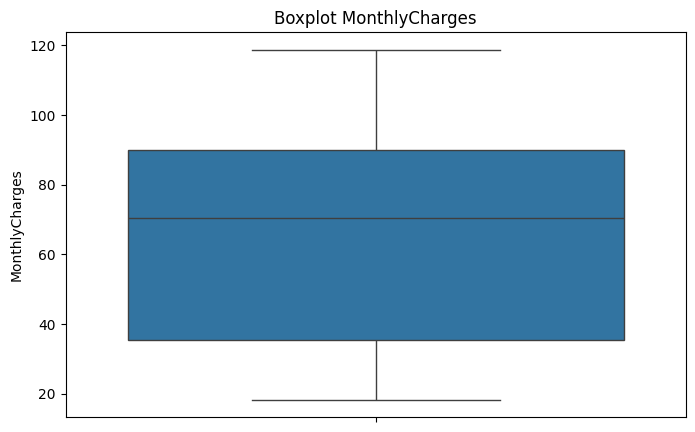

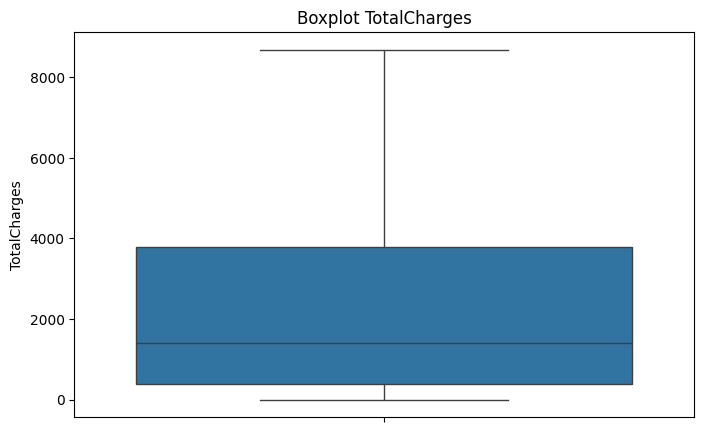

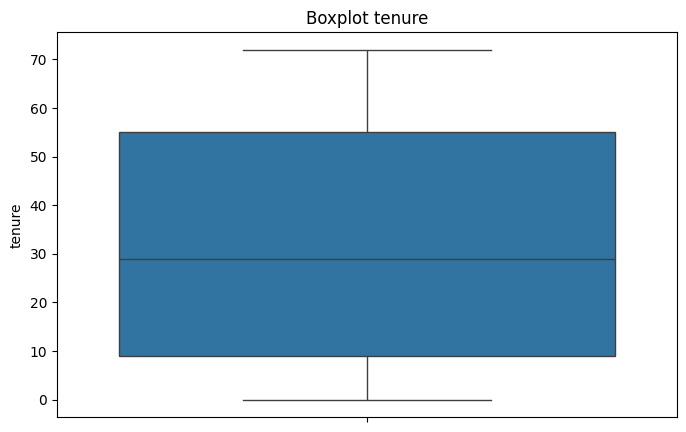

In [12]:
for i, feature in enumerate(['MonthlyCharges', 'TotalCharges', 'tenure']):
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature}')
    plt.show()

**Insight**

Berdasarkan hasil visualisasi boxplot, distribusi data berada sepenuhnya dalam batas whisker sehingga tidak ada nilai ekstrem yang menyimpang. Artinya, sebaran data relatif bersih dan tidak ada anomali signifikan yang perlu dikhawatirkan dalam analisis lebih lanjut.

**Cek Feature vs Churn**

C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_27712\3661318565.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Churn', y='tenure', estimator='median', palette=palette)
C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_27712\3661318565.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Churn', y='MonthlyCharges', estimator='median', palette=palette)
C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_27712\3661318565.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, 

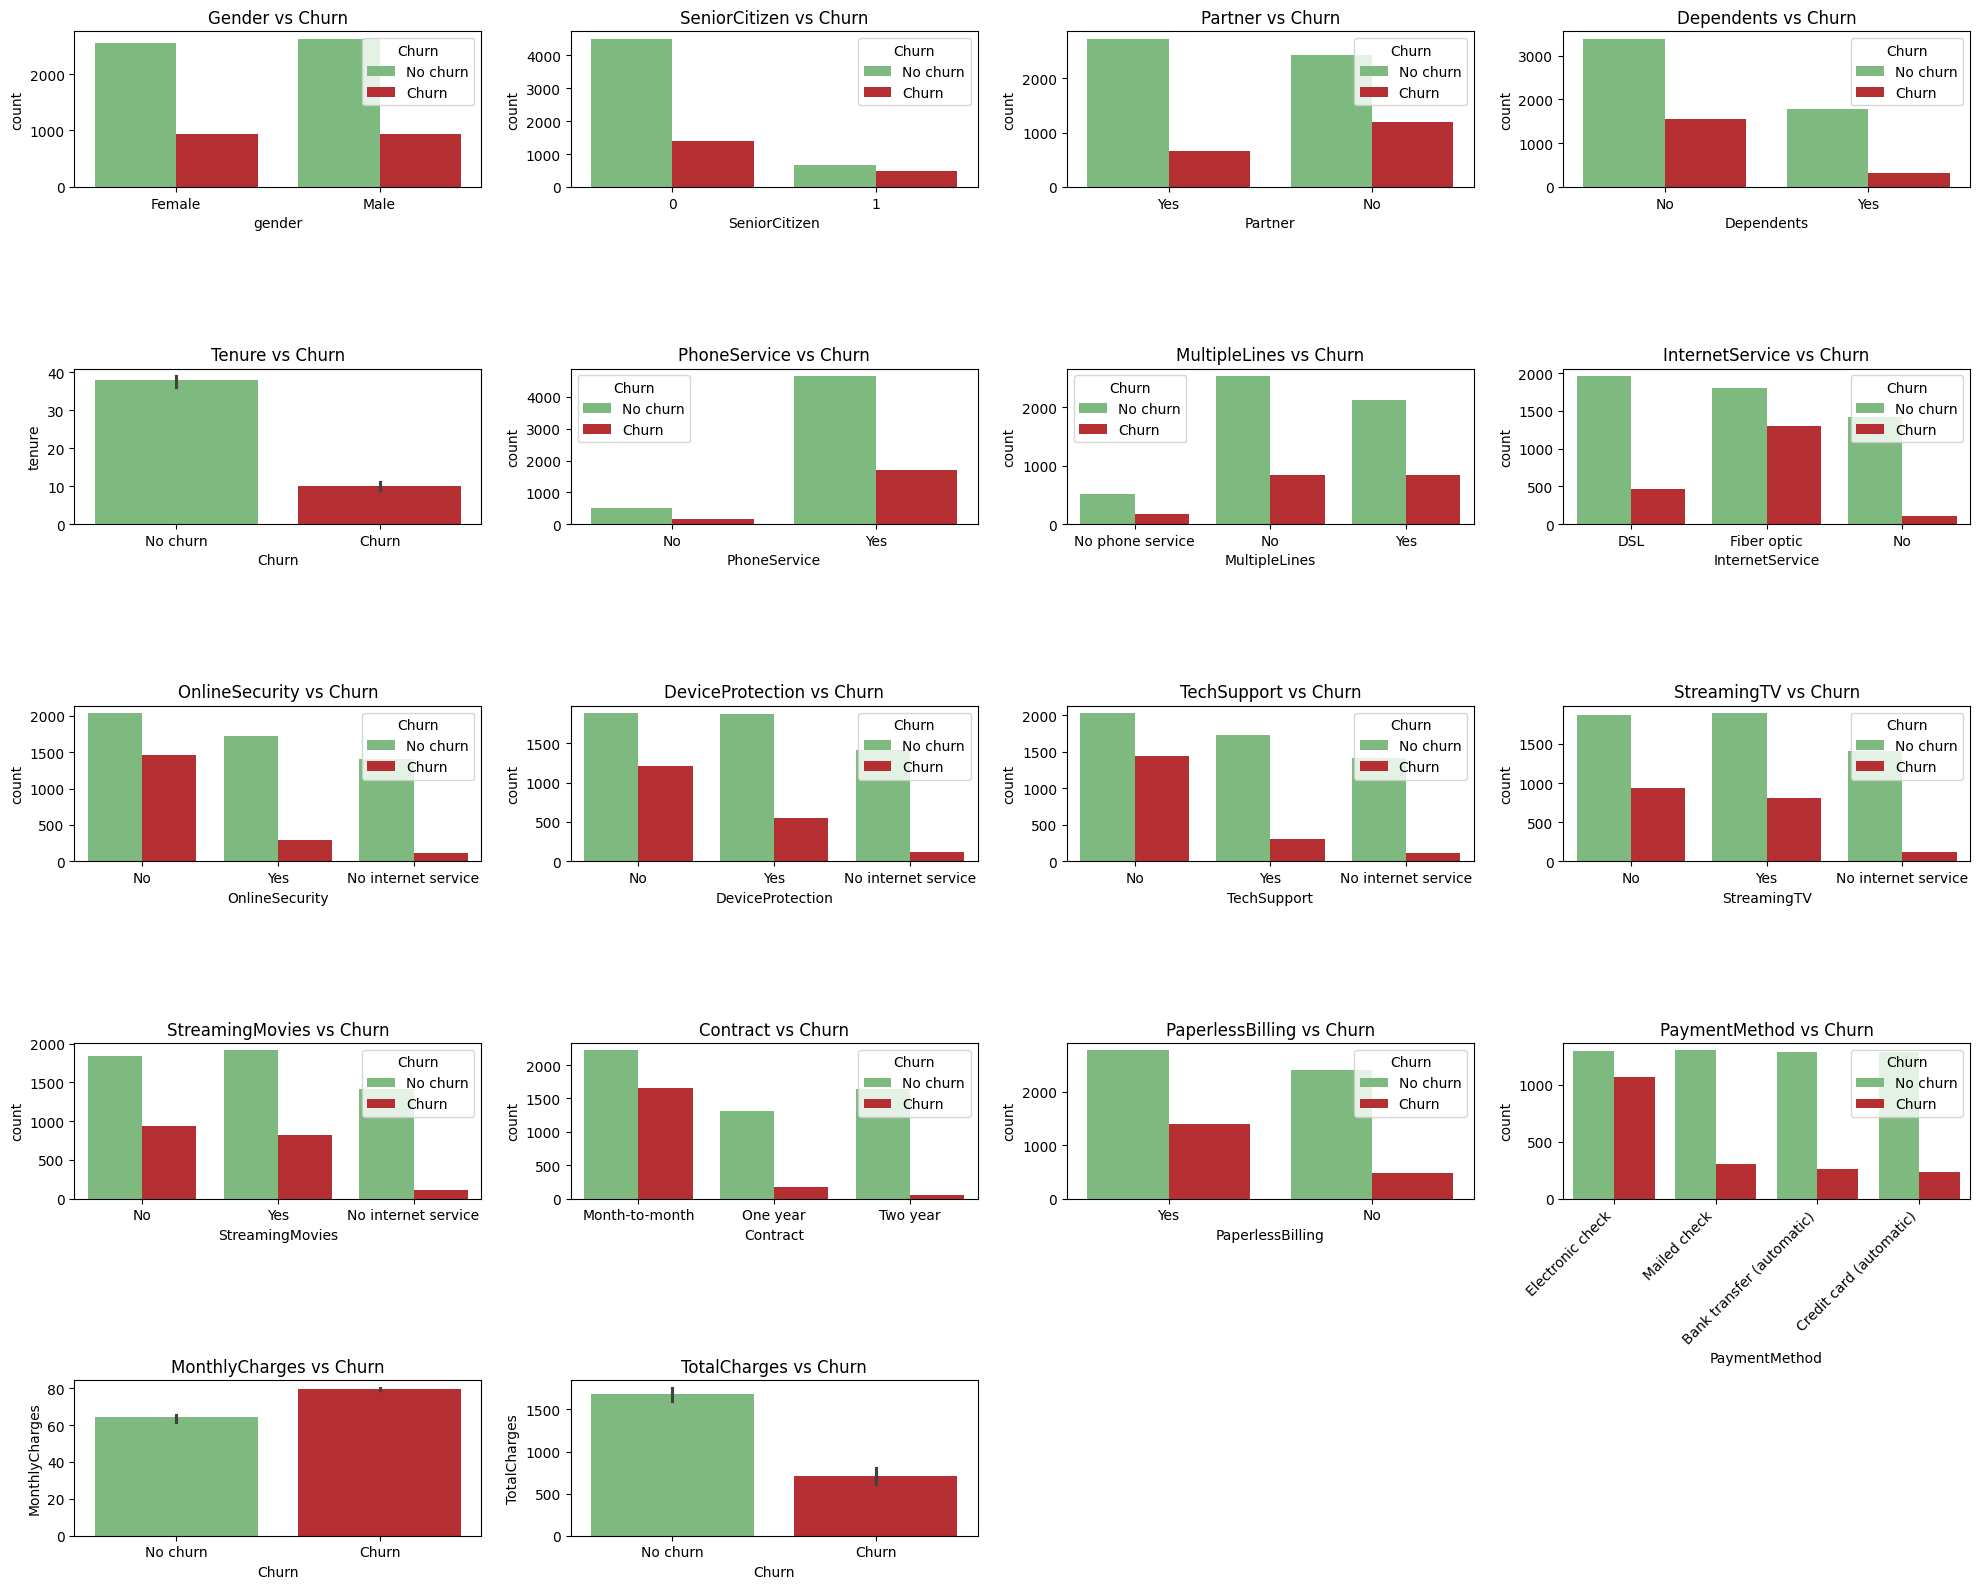

=== Peringkat Pengaruh Fitur Terhadap Churn ===
               Fitur         Tipe  EffectSize
0             tenure    Numerikal    0.479734
1           Contract  Kategorikal    0.410116
2     OnlineSecurity  Kategorikal    0.347400
3        TechSupport  Kategorikal    0.342916
4    InternetService  Kategorikal    0.322455
5      PaymentMethod  Kategorikal    0.303359
6       TotalCharges    Numerikal    0.300692
7       OnlineBackup  Kategorikal    0.292316
8   DeviceProtection  Kategorikal    0.281580
9     MonthlyCharges    Numerikal    0.241571
10   StreamingMovies  Kategorikal    0.230951
11       StreamingTV  Kategorikal    0.230502
12  PaperlessBilling  Kategorikal    0.191498
13        Dependents  Kategorikal    0.163870
14           Partner  Kategorikal    0.150126
15     SeniorCitizen    Numerikal    0.125961
16     MultipleLines  Kategorikal    0.040109
17      PhoneService  Kategorikal    0.011398
18            gender  Kategorikal    0.008291


In [13]:
# Copy dataframe dan ganti label
df_plot = df.copy()
df_plot["Churn"] = df_plot["Churn"].replace({"Yes": "Churn", "No": "No churn"})
palette = {"No churn": "#74c476", "Churn": "#cb181d"}

plt.figure(figsize=(20,16))

# 1
plt.subplot(5,4,1)
sns.countplot(data=df_plot, x='gender', hue='Churn', palette=palette)
plt.title('Gender vs Churn')


# 2
plt.subplot(5,4,2)
sns.countplot(data=df_plot, x='SeniorCitizen', hue='Churn', palette=palette)
plt.title('SeniorCitizen vs Churn')


# 3
plt.subplot(5,4,3)
sns.countplot(data=df_plot, x='Partner', hue='Churn', palette=palette)
plt.title('Partner vs Churn')


# 4
plt.subplot(5,4,4)
sns.countplot(data=df_plot, x='Dependents', hue='Churn', palette=palette)
plt.title('Dependents vs Churn')


# 5
plt.subplot(5,4,5)
sns.barplot(data=df_plot, x='Churn', y='tenure', estimator='median', palette=palette)
plt.title('Tenure vs Churn')


# 6
plt.subplot(5,4,6)
sns.countplot(data=df_plot, x='PhoneService', hue='Churn', palette=palette)
plt.title('PhoneService vs Churn')


# 7
plt.subplot(5,4,7)
sns.countplot(data=df_plot, x='MultipleLines', hue='Churn', palette=palette)
plt.title('MultipleLines vs Churn')


# 8
plt.subplot(5,4,8)
sns.countplot(data=df_plot, x='InternetService', hue='Churn', palette=palette)
plt.title('InternetService vs Churn')


# 9
plt.subplot(5,4,9)
sns.countplot(data=df_plot, x='OnlineSecurity', hue='Churn', palette=palette)
plt.title('OnlineSecurity vs Churn')


# 10
plt.subplot(5,4,10)
sns.countplot(data=df_plot, x='DeviceProtection', hue='Churn', palette=palette)
plt.title('DeviceProtection vs Churn')


# 11
plt.subplot(5,4,11)
sns.countplot(data=df_plot, x='TechSupport', hue='Churn', palette=palette)
plt.title('TechSupport vs Churn')


# 12
plt.subplot(5,4,12)
sns.countplot(data=df_plot, x='StreamingTV', hue='Churn', palette=palette)
plt.title('StreamingTV vs Churn')


# 13
plt.subplot(5,4,13)
sns.countplot(data=df_plot, x='StreamingMovies', hue='Churn', palette=palette)
plt.title('StreamingMovies vs Churn')


# 14
plt.subplot(5,4,14)
sns.countplot(data=df_plot, x='Contract', hue='Churn', palette=palette)
plt.title('Contract vs Churn')


# 15
plt.subplot(5,4,15)
sns.countplot(data=df_plot, x='PaperlessBilling', hue='Churn', palette=palette)
plt.title('PaperlessBilling vs Churn')


# 16
plt.subplot(5,4,16)
sns.countplot(data=df_plot, x='PaymentMethod', hue='Churn', palette=palette)
plt.title('PaymentMethod vs Churn')
plt.xticks(rotation=45, ha='right')


# 17
plt.subplot(5,4,17)
sns.barplot(data=df_plot, x='Churn', y='MonthlyCharges', estimator='median', palette=palette)
plt.title('MonthlyCharges vs Churn')

# 18
plt.subplot(5,4,18)
sns.barplot(data=df_plot, x='Churn', y='TotalCharges', estimator='median', palette=palette)
plt.title('TotalCharges vs Churn')


plt.tight_layout()
plt.show()

# --- Analisis pengaruh fitur terhadap Churn ---
target = "Churn"

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2/min(k-1, r-1))

# Kategorikal
cat_cols = df_plot.select_dtypes(include=["object"]).columns.tolist()
if "customerID" in cat_cols: cat_cols.remove("customerID")
if target in cat_cols: cat_cols.remove(target)

# Numerikal
num_cols = df_plot.select_dtypes(include=["int64","float64"]).columns.tolist()
if "customerID" in num_cols: num_cols.remove("customerID")

# Analisis kategorikal
cat_effects = []
for col in cat_cols:
    table = pd.crosstab(df_plot[col], df_plot[target])
    v = cramers_v(table)
    cat_effects.append({"Fitur": col, "Tipe": "Kategorikal", "EffectSize": v})

# Analisis numerikal
df_bin = df_plot.copy()
df_bin["ChurnFlag"] = df_bin["Churn"].map({"Churn": 1, "No churn": 0})

num_effects = []
for col in num_cols:
    churn_yes = df_bin[df_bin["ChurnFlag"]==1][col].dropna()
    churn_no  = df_bin[df_bin["ChurnFlag"]==0][col].dropna()
    if len(churn_yes) > 0 and len(churn_no) > 0:
        u_stat, p = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')
        n1, n2 = len(churn_yes), len(churn_no)
        rbc = 1 - (2*u_stat)/(n1*n2)
        num_effects.append({"Fitur": col, "Tipe": "Numerikal", "EffectSize": abs(rbc)})

all_effects = pd.DataFrame(cat_effects + num_effects)
all_effects = all_effects.sort_values("EffectSize", ascending=False).reset_index(drop=True)

print("=== Peringkat Pengaruh Fitur Terhadap Churn ===")
print(all_effects)

**Insight**

Cramér’s V dan rank-biserial correlation dipakai untuk mengukur seberapa kuat hubungan antara variabel target Churn dengan setiap fitur, hanya beda sesuai tipe datanya. Untuk fitur kategorikal, Cramér’s V digunakan karena mampu mengukur kekuatan asosiasi antara dua variabel kategori tanpa terpengaruh oleh ukuran sampel. Sementara untuk fitur numerikal, rank-biserial correlation dipakai karena ia mengukur efek perbedaan distribusi antara kelompok churn Yes dan No dengan membandingkan ranking nilainya. Dengan kombinasi keduanya, kita bisa mendapatkan gambaran yang konsisten tentang fitur mana yang paling berpengaruh terhadap churn, baik yang bersifat kategorikal maupun numerikal dalam bentuk Effect Size.

Effect size adalah ukuran seberapa kuat hubungan suatu fitur dengan target yaitu churn. Interpretasi standar pada nilai sekitar 0.1 dianggap lemah, 0.3 sedang, dan 0.5 atau lebih kuat. Hasil analisis menempatkan tenure (0.48) dan Contract (0.41) sebagai faktor dengan asosiasi paling kuat, menunjukkan bahwa jenis kontrak dan tenure berkorelasi dengan tingkat churn. Selain itu, fitur layanan tambahan seperti OnlineSecurity (0.35), TechSupport (0.34), dan InternetService (0.32) memperlihatkan asosiasi sedang-kuat, memberi sinyal bahwa penggunaan layanan ini memiliki keterkaitan terkait perilaku churn pelanggan. Faktor lain seperti PaymentMethod (0.30) dan TotalCharges (0.30) masih memiliki hubungan sedang, variabel seperti Dependents (0.16), Partner (0.15), SeniorCitizen (0.13), hanya berhubungan lemah, dan variabel seperti MultipleLines (0.04), PhoneServices (0.01), dan gender (0.008) praktis tidak memiliki pengaruh.




Tenure (Lama Berlangganan)

- Pelanggan dengan masa berlangganan singkat lebih banyak melakukan churn.

- Semakin lama pelanggan bertahan, semakin kecil kemungkinan churn.

Contract (Jenis Kontrak)

- Kontrak bulanan (month-to-month) sangat dominan pada pelanggan yang churn.

- Kontrak 1 tahun atau 2 tahun lebih cenderung bertahan (churn rendah).

- Artinya, jangka kontrak lebih panjang → loyalitas lebih tinggi.

Internet Service (Jenis Layanan Internet)

- Pelanggan dengan Fiber optic memiliki churn lebih tinggi dibanding DSL.

- Bisa jadi karena harga lebih tinggi atau ekspektasi layanan yang tidak terpenuhi.

OnlineSecurity & TechSupport

- Pelanggan tanpa layanan keamanan online dan support teknis lebih banyak churn.

- Artinya, fitur tambahan berhubungan dengan retensi pelanggan.

Paperless Billing

- Pelanggan dengan paperless billing lebih banyak yang churn.

- Bisa jadi karena paperless billing biasanya terkait pembayaran online bulanan (month-to-month contract).

Payment Method

- Electronic check memiliki churn tertinggi.

- Automatic payment (bank transfer/credit card auto) churn lebih rendah.

- Artinya, metode pembayaran memengaruhi stabilitas langganan.

MonthlyCharges & TotalCharges

- Pelanggan dengan biaya bulanan tinggi lebih banyak churn.

- Namun, pelanggan dengan total charges tinggi (artinya sudah lama berlangganan) justru churn lebih sedikit.

Gender

- Laki-laki dan perempuan memiliki tingkat churn hampir sama → tidak signifikan.

SeniorCitizen

- Sedikit lebih banyak churn pada kelompok senior, tapi perbedaannya tidak terlalu tajam.

Partner & Dependents

- Pelanggan yang memiliki partner atau dependents cenderung lebih setia (churn lebih rendah).

- Ada korelasi, tapi tidak sekuat faktor kontrak atau layanan internet.

PhoneService & MultipleLines

- Tidak ada pola jelas terhadap churn.

- Hampir seimbang antara churn dan tidak churn.

StreamingTV & StreamingMovies

- Tidak terlalu signifikan, meski pelanggan tanpa layanan tambahan ini sedikit lebih banyak churn.





**Cek jumlah Churn**

Fungsinya untuk mengetahui berapa banyak pelanggan yang churn dibandingkan dengan yang tidak churn, sehingga bisa jadi gambaran awal seberapa besar masalah churn dalam dataset sebelum masuk ke analisis lebih lanjut.

Jumlah churn dan tidak churn:
Churn
No churn    5174
Churn       1869
Name: count, dtype: int64

Persentase churn:
Churn
No churn    73.463013
Churn       26.536987
Name: proportion, dtype: float64
--------------------------------------------------------------------------------


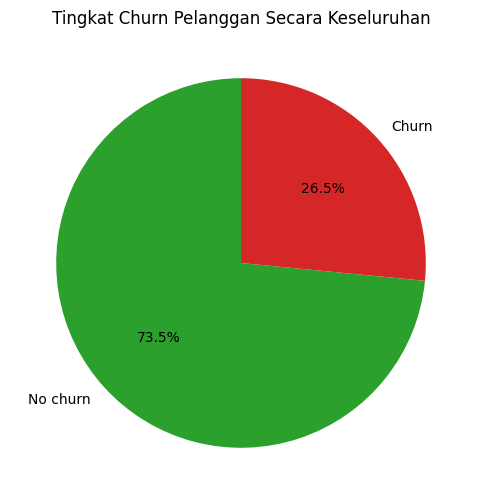

--------------------------------------------------------------------------------


C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_27712\1652632380.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x='Churn', palette={"No churn": "#2ca02c", "Churn": "#d62728"})


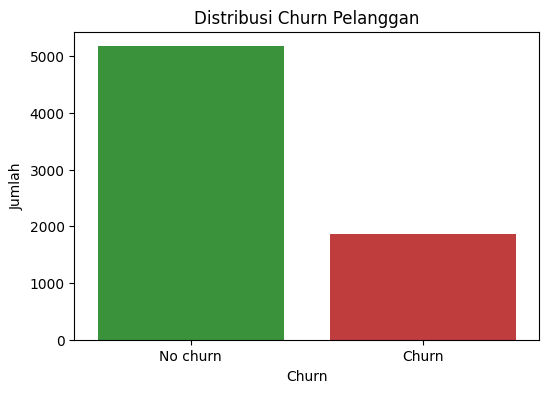

In [14]:
# Salin DataFrame agar tidak merubah df asli
df_plot = df.copy()

# Ganti label Yes/No menjadi Churn/No churn
df_plot['Churn'] = df_plot['Churn'].replace({'Yes': 'Churn', 'No': 'No churn'})

# Hitung jumlah
churn_counts = df_plot['Churn'].value_counts()
print("Jumlah churn dan tidak churn:")
print(churn_counts)

# Hitung persentase
churn_percent = df_plot['Churn'].value_counts(normalize=True) * 100
print("\nPersentase churn:")
print(churn_percent)
print("-"*80)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts, 
    labels=churn_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["#2ca02c", "#d62728"]  # No churn = hijau, Churn = merah
)
plt.title("Tingkat Churn Pelanggan Secara Keseluruhan")
plt.show()
print("-"*80)

# Bar chart
plt.figure(figsize=(6,4))
sns.countplot(data=df_plot, x='Churn', palette={"No churn": "#2ca02c", "Churn": "#d62728"})
plt.title("Distribusi Churn Pelanggan")
plt.ylabel("Jumlah")
plt.show()


**Insight :**

Dari data terlihat bahwa jumlah pelanggan yang tidak churn sebanyak 5163 orang (73,4%), sedangkan pelanggan yang churn sebanyak 1869 orang (26,6%). Hal ini menunjukkan bahwa sekitar satu dari empat pelanggan berhenti berlangganan. Proporsi churn yang cukup tinggi ini menandakan adanya masalah dalam menjaga loyalitas pelanggan. Kondisi ini penting diperhatikan karena churn dalam jumlah besar dapat berdampak langsung pada pendapatan perusahaan, terutama jika yang berhenti adalah pelanggan dengan biaya bulanan tinggi atau pelanggan baru yang belum lama bergabung.

**Cek Distribusi data numerik**

Fungsinya untuk melihat distribusi data numerik, apakah condong ke kiri/kanan, simetris, ada outlier, atau pola tertentu yang bisa memengaruhi interpretasi dan pemilihan model analisis.

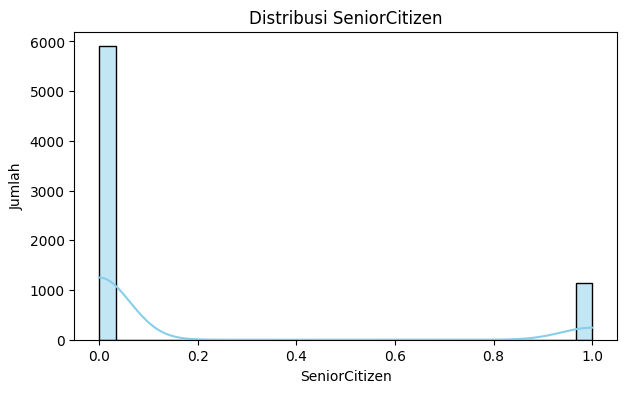

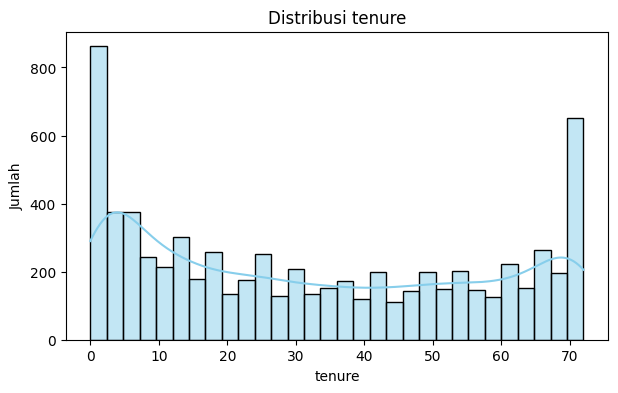

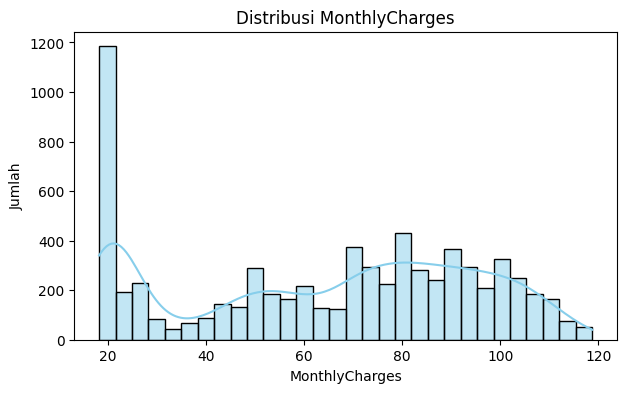

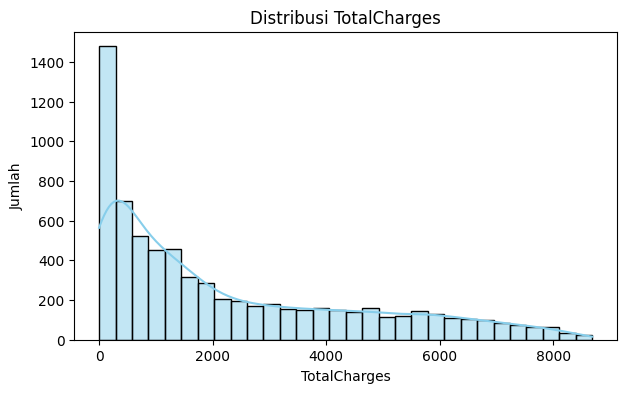

In [15]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.show()

**Insight**

Distribusi data menunjukkan bahwa sebagian besar pelanggan Telco bukan senior citizen, sehingga faktor usia tidak terlalu dominan terhadap churn. Pola tenure memperlihatkan bahwa pelanggan baru dengan masa berlangganan rendah jauh lebih berisiko churn dibanding pelanggan lama yang cenderung loyal dengan tenure panjang dan total pengeluaran tinggi. Sementara itu, biaya bulanan (MonthlyCharges) yang lebih tinggi tampak menjadi salah satu faktor utama yang mendorong pelanggan untuk berhenti berlangganan, karena pelanggan dengan biaya rendah relatif lebih stabil dalam bertahan.

## **Methodology For Analysis**

### **Apakah terdapat perbedaan signifikan tingkat churn antara gender tertentu?**

Tabel Kontingensi:
 Churn   Churn  No churn
gender                 
Female    939      2549
Male      930      2625

Hasil Uji Chi-Square
Chi2 Statistic: 0.4840828822091383
Degrees of Freedom: 1
p-value: 0.48657873605618596
Kesimpulan: Tidak terdapat perbedaan signifikan tingkat churn antara gender.
----------------------------------------------------------------------------------------------------


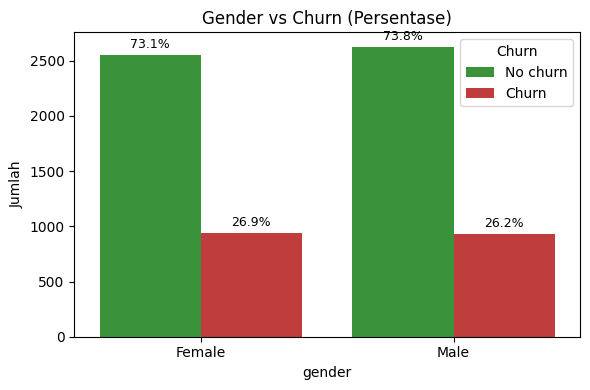

In [16]:
# Salin dataframe agar tidak mengubah df asli
df_plot = df.copy()

# Ganti label Yes/No menjadi Churn/No churn
df_plot['Churn'] = df_plot['Churn'].replace({'Yes': 'Churn', 'No': 'No churn'})

# Tabel kontingensi
contingency_table = pd.crosstab(df_plot['gender'], df_plot['Churn'])
print("Tabel Kontingensi:\n", contingency_table)

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nHasil Uji Chi-Square")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Interpretasi
alpha = 0.05
if p < alpha:
    print("Kesimpulan: Terdapat perbedaan signifikan tingkat churn antara gender.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan tingkat churn antara gender.")
print("-"*100)

# Plot
palette_dict = {
    "Churn": "#d62728",      # merah
    "No churn": "#2ca02c"    # hijau
}

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_plot, x='gender', hue='Churn', palette=palette_dict)

# Ambil urutan kategori sesuai sumbu x
order = [t.get_text() for t in ax.get_xticklabels()]

# total per gender
group_totals = df_plot['gender'].value_counts().reindex(order)

# loop tiap container (Churn/No churn)
for container in ax.containers:
    for bar, category in zip(container, order):
        height = bar.get_height()
        total = group_totals.loc[category]
        perc = 100 * height / total if total > 0 else 0
        ax.annotate(f'{perc:.1f}%',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

plt.title("Gender vs Churn (Persentase)")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.savefig("Gender_vs_Churn_Persentase.png", transparent=True, dpi=300)
plt.show()


**Insight**

Berdasarkan hasil uji Chi-Square yang dilakukan pada tabel kontingensi antara gender dan churn, diperoleh nilai p sebesar 0,486 yang jauh lebih besar daripada ambang signifikansi 0,05. Hal ini menunjukkan bahwa tidak terdapat hubungan yang signifikan antara jenis kelamin pelanggan dengan tingkat churn. Dengan kata lain, baik pelanggan laki-laki maupun perempuan memiliki kemungkinan churn yang hampir sama, di mana proporsi churn perempuan tercatat sekitar 26,9% dan laki-laki sekitar 26,2%, sehingga selisihnya sangat kecil dan tidak berarti secara statistik. Temuan ini memberikan gambaran bahwa gender bukanlah faktor yang relevan dalam menjelaskan perilaku churn, sehingga perusahaan sebaiknya tidak mendasarkan strategi retensi pelanggan pada perbedaan gender. Sebaliknya, fokus analisis perlu dialihkan ke variabel lain yang lebih potensial, seperti lama berlangganan, jenis kontrak, biaya bulanan, atau layanan yang digunakan, karena faktor-faktor tersebut kemungkinan lebih berpengaruh terhadap keputusan pelanggan untuk tetap bertahan atau berhenti berlangganan.

### **Apakah metode pembayaran tertentu berhubungan dengan tingkat churn?**

Tabel Kontingensi:
 Churn                      Churn  No churn
PaymentMethod                             
Bank transfer (automatic)    258      1286
Credit card (automatic)      232      1290
Electronic check            1071      1294
Mailed check                 308      1304

Hasil Uji Chi-Square
Chi2 Statistic: 648.1423274814
Degrees of Freedom: 3
p-value: 3.6823546520097993e-140
Kesimpulan: Terdapat perbedaan signifikan tingkat churn antara PaymentMethod.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


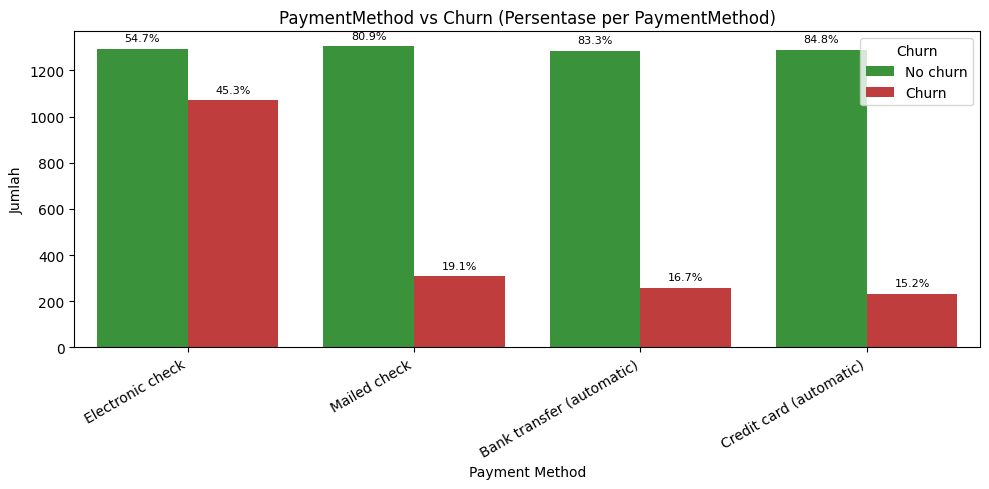

In [17]:
# Buat salinan DataFrame agar tidak mengubah df asli
df_plot = df.copy()

# Ganti label Yes/No menjadi Churn/No churn
df_plot['Churn'] = df_plot['Churn'].replace({'Yes': 'Churn', 'No': 'No churn'})

# Tabel kontingensi
contingency_table = pd.crosstab(df_plot['PaymentMethod'], df_plot['Churn'])
print("Tabel Kontingensi:\n", contingency_table)

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nHasil Uji Chi-Square")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Interpretasi
alpha = 0.05
if p < alpha:
    print("Kesimpulan: Terdapat perbedaan signifikan tingkat churn antara PaymentMethod.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan tingkat churn antara PaymentMethod.")
print("-"*170)    

# Plot
palette_dict = {
    "Churn": "#d62728",      # merah
    "No churn": "#2ca02c"    # hijau
}

plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_plot, x='PaymentMethod', hue='Churn', palette=palette_dict)

# urutan kategori sesuai xticklabels (sama dengan urutan bar)
order = [t.get_text() for t in ax.get_xticklabels()]

# total per PaymentMethod sesuai urutan
group_totals = df_plot['PaymentMethod'].value_counts().reindex(order).fillna(0).astype(int)

# setiap container = satu level hue (mis. Churn/No churn)
for container in ax.containers:
    for bar, category in zip(container, order):
        height = bar.get_height()
        total = group_totals.loc[category]
        perc = 100 * height / total if total > 0 else 0
        ax.annotate(f'{perc:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)

plt.title("PaymentMethod vs Churn (Persentase per PaymentMethod)")
plt.ylabel("Jumlah")
plt.xlabel("Payment Method")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig("PaymentMethod_vs_Churn_Persentase_per_PaymentMethod.png", transparent=True, dpi=300)
plt.show()



**Insight**

Berdasarkan hasil uji Chi-Square, terdapat hubungan yang sangat signifikan antara metode pembayaran dengan tingkat churn pelanggan. Pelanggan yang menggunakan electronic check tercatat lebih banyak yang churn dibandingkan metode pembayaran lainnya, sehingga dapat disimpulkan bahwa kelompok ini lebih rentan berhenti berlangganan. Sebaliknya, pelanggan yang menggunakan metode pembayaran otomatis melalui bank transfer maupun credit card menunjukkan kecenderungan churn yang jauh lebih rendah, yang menandakan bahwa pembayaran otomatis membuat pelanggan lebih loyal. Sementara itu, pelanggan yang menggunakan mailed check berada pada posisi tengah, tidak setinggi electronic check tetapi juga tidak sebaik metode otomatis. Temuan ini menunjukkan bahwa metode pembayaran berperan penting terhadap perilaku churn, sehingga perusahaan perlu mendorong lebih banyak pelanggan untuk beralih ke metode pembayaran otomatis dan memberikan perhatian khusus pada pelanggan yang masih menggunakan electronic check.


### **Apakah terdapat perbedaan rata-rata MonthlyCharges dan TotalCharges antara pelanggan churn dan loyal?**


=== Uji Normalitas MonthlyCharges ===
Churn = No churn | Statistik = 0.913, p-value = 0.00000 | Tolak H0 → Data tidak berdistribusi normal
Churn = Churn | Statistik = 0.928, p-value = 0.00000 | Tolak H0 → Data tidak berdistribusi normal

=== Uji Normalitas TotalCharges ===
Churn = No churn | Statistik = 0.883, p-value = 0.00000 | Tolak H0 → Data tidak berdistribusi normal
Churn = Churn | Statistik = 0.779, p-value = 0.00000 | Tolak H0 → Data tidak berdistribusi normal
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
=== MonthlyCharges ===
Statistik: 6003125.5 p-value: 3.311627651988584e-54
Kesimpulan: Ada perbedaan signifikan

=== TotalCharges ===
Statistik: 3381224.0 p-value: 5.685033866207314e-83
Kesimpulan: Ada perbedaan signifikan
-----------------------------------------------------------------------------------------------------------

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5174.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_27712\4120690727.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


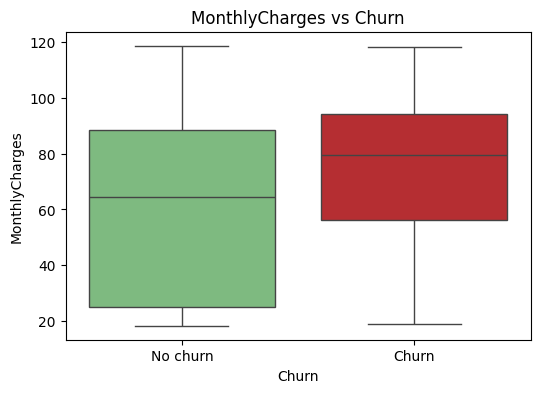

C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_27712\4120690727.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


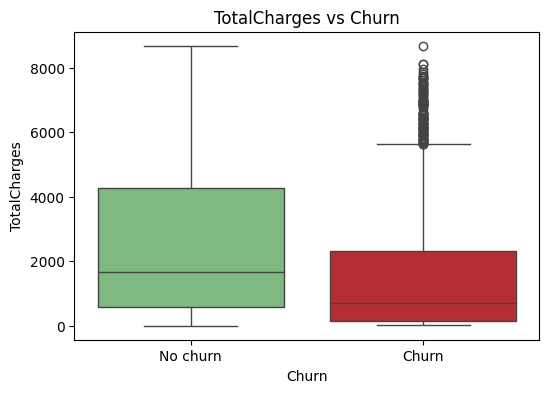

In [18]:
from scipy.stats import shapiro, mannwhitneyu

# --- Buat salinan dataframe agar df asli tidak berubah ---
df_plot = df.copy()

# --- Ganti label Churn untuk visualisasi ---
df_plot['Churn'] = df_plot['Churn'].replace({"Yes": "Churn", "No": "No churn"})

# === Uji Normalitas (Shapiro-Wilk) ===
for col in ['MonthlyCharges', 'TotalCharges']:
    print(f"\n=== Uji Normalitas {col} ===")
    for group in df_plot['Churn'].unique():
        data = df_plot[df_plot['Churn'] == group][col].dropna()
        stat, p = shapiro(data)

        if p > 0.05:
            kesimpulan = "Gagal tolak H0 → Data berdistribusi normal"
        else:
            kesimpulan = "Tolak H0 → Data tidak berdistribusi normal"
        
        print(f"Churn = {group} | Statistik = {stat:.3f}, p-value = {p:.5f} | {kesimpulan}")

print("-"*195)

# === Uji Mann-Whitney U ===
mc_churn = df_plot[df_plot["Churn"]=="Churn"]['MonthlyCharges'].dropna()
mc_no_churn  = df_plot[df_plot["Churn"]=="No churn"]['MonthlyCharges'].dropna()

stat_mc, p_mc = mannwhitneyu(mc_churn, mc_no_churn, alternative='two-sided')
print("=== MonthlyCharges ===")
print("Statistik:", stat_mc, "p-value:", p_mc)
print("Kesimpulan:", "Ada perbedaan signifikan" if p_mc <= 0.05 else "Tidak ada perbedaan signifikan")

tc_churn = df_plot[df_plot["Churn"]=="Churn"]['TotalCharges'].dropna()
tc_no_churn  = df_plot[df_plot["Churn"]=="No churn"]['TotalCharges'].dropna()

stat_tc, p_tc = mannwhitneyu(tc_churn, tc_no_churn, alternative='two-sided')
print("\n=== TotalCharges ===")
print("Statistik:", stat_tc, "p-value:", p_tc)
print("Kesimpulan:", "Ada perbedaan signifikan" if p_tc <= 0.05 else "Tidak ada perbedaan signifikan")

print("-"*185)

# === Visualisasi Boxplot ===
# MonthlyCharges
plt.figure(figsize=(6,4))
ax = sns.boxplot(
    data=df_plot, x='Churn', y='MonthlyCharges',
    palette={"No churn": "#74c476", "Churn": "#cb181d"}
)
plt.setp(ax.artists, alpha=0.7)
plt.title("MonthlyCharges vs Churn")
plt.ylabel("MonthlyCharges")
plt.show()

# TotalCharges
plt.figure(figsize=(6,4))
ax = sns.boxplot(
    data=df_plot, x='Churn', y='TotalCharges',
    palette={"No churn": "#74c476", "Churn": "#cb181d"}
)
plt.setp(ax.artists, alpha=0.7)
plt.title("TotalCharges vs Churn")
plt.ylabel("TotalCharges")
plt.show()

**Insight**

Berdasarkan hasil uji Mann-Whitney U Test terhadap variabel MonthlyCharges dan TotalCharges, diperoleh nilai p-value yang jauh lebih kecil dari 0.05 pada kedua variabel, sehingga dapat disimpulkan bahwa terdapat perbedaan signifikan antara pelanggan churn dan pelanggan loyal. Perbedaan ini menunjukkan bahwa pelanggan yang churn umumnya memiliki biaya bulanan (MonthlyCharges) yang lebih tinggi dibandingkan pelanggan yang tetap bertahan, sehingga besarnya tagihan bulanan dapat menjadi salah satu faktor pemicu churn. Sementara itu, pada variabel TotalCharges, pelanggan churn justru memiliki total pembayaran yang lebih rendah dibanding pelanggan loyal, karena mereka berhenti berlangganan lebih cepat sehingga akumulasi pembayaran yang dikeluarkan selama masa berlangganan lebih sedikit. Temuan ini mengindikasikan bahwa pelanggan dengan biaya bulanan tinggi lebih rentan untuk churn, dan banyak di antaranya yang keluar lebih awal, sehingga strategi retensi perlu difokuskan pada pelanggan dengan tagihan tinggi sejak awal masa langganan agar mereka merasakan manfaat yang sebanding dengan biaya yang dikeluarkan.

### **Bagaimana perbedaan MonthlyCharges antara pelanggan churn dan loyal jika dilihat berdasarkan jenis layanan?**


=== Uji Normalitas untuk DSL ===
Churn=No churn | Statistik=0.986, p-value=0.00000 | Tolak H0 → Tidak normal
Churn=Churn | Statistik=0.974, p-value=0.00000 | Tolak H0 → Tidak normal

=== Uji Normalitas untuk Fiber optic ===
Churn=Churn | Statistik=0.965, p-value=0.00000 | Tolak H0 → Tidak normal
Churn=No churn | Statistik=0.972, p-value=0.00000 | Tolak H0 → Tidak normal

=== Uji Normalitas untuk No ===
Churn=No churn | Statistik=0.744, p-value=0.00000 | Tolak H0 → Tidak normal
Churn=Churn | Statistik=0.640, p-value=0.00000 | Tolak H0 → Tidak normal
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== DSL ===
Mann-Whitney Statistik=269109.000, p-value=0.00000
Tolak H0 → Ada perbedaan signifikan

=== Fiber optic ===
Mann-Whitney Statistik=862224.500, p-value=0.00000
Tolak H0 → Ada perbedaan signifikan

=== No ===
Mann-Whitney Statistik=66820.500, p-va

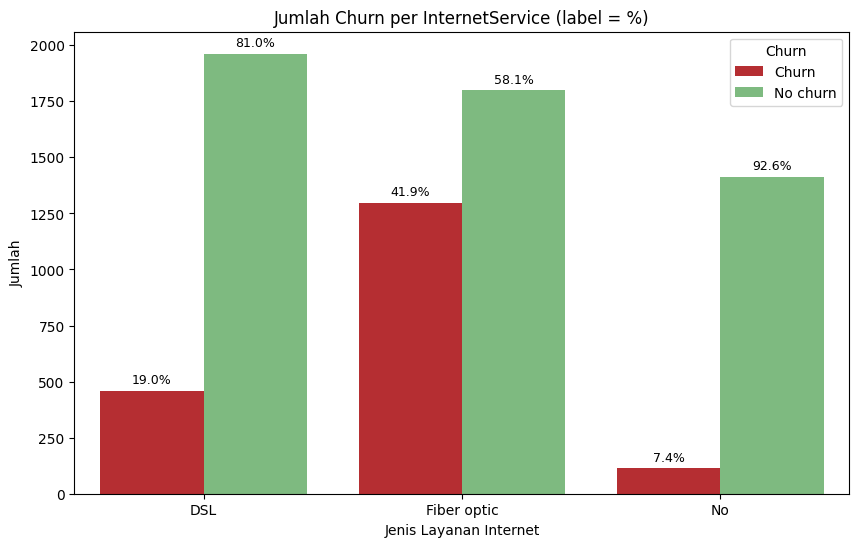

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


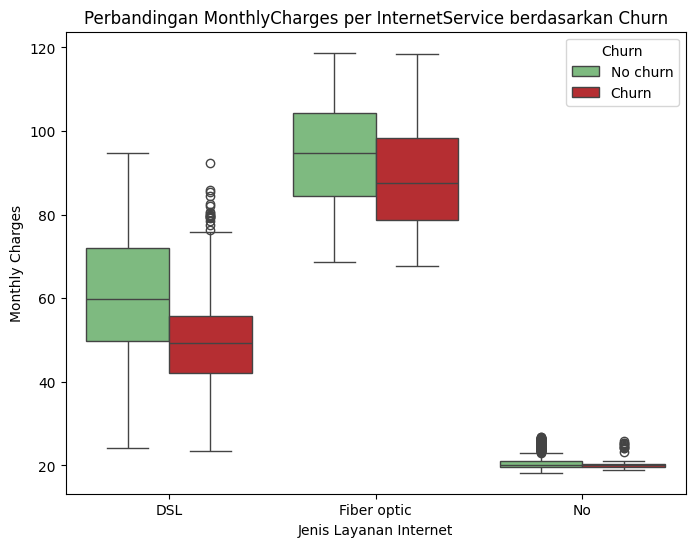

In [19]:
# --- Buat salinan dataframe agar df asli tidak berubah ---
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].replace({"No": "No churn", "Yes": "Churn", })

# === Uji Normalitas per InternetService ===
for service in df_plot['InternetService'].unique():
    print(f"\n=== Uji Normalitas untuk {service} ===")
    subset = df_plot[df_plot['InternetService'] == service]
    for group in subset['Churn'].unique():
        data = subset[subset['Churn'] == group]['MonthlyCharges'].dropna()
        stat, p = shapiro(data)

        if p > 0.05:
            kesimpulan = "Gagal tolak H0 → Normal"
        else:
            kesimpulan = "Tolak H0 → Tidak normal"

        print(f"Churn={group} | Statistik={stat:.3f}, p-value={p:.5f} | {kesimpulan}")
print("-"*185)

# === Uji Mann-Whitney per InternetService ===
for service in df_plot['InternetService'].unique():
    subset = df_plot[df_plot['InternetService'] == service]
    mc_churn = subset[subset['Churn']=="Churn"]['MonthlyCharges'].dropna()
    mc_no_churn = subset[subset['Churn']=="No churn"]['MonthlyCharges'].dropna()

    stat, p = mannwhitneyu(mc_churn, mc_no_churn, alternative='two-sided')
    print(f"\n=== {service} ===")
    print(f"Mann-Whitney Statistik={stat:.3f}, p-value={p:.5f}")
    if p > 0.05:
        print("Gagal tolak H0 → Tidak ada perbedaan signifikan")
    else:
        print("Tolak H0 → Ada perbedaan signifikan")
print("-"*185)

# === Barplot Jumlah Churn per InternetService (dengan label %) ===
counts = df_plot.groupby(["InternetService", "Churn"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
ax = sns.barplot(data=counts, x="InternetService", y="count", hue="Churn",
                palette={"No churn": "#74c476", "Churn": "#cb181d"})

# total per InternetService
group_totals = counts.groupby("InternetService")["count"].sum()

# tambahkan label persentase di atas bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x_center = bar.get_x() + bar.get_width()/2
        label = ax.get_xticklabels()[int(round(x_center))].get_text()
        total = group_totals[label]
        perc = 100 * height / total if total > 0 else 0
        ax.annotate(f"{perc:.1f}%", xy=(x_center, height), xytext=(0,3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.title("Jumlah Churn per InternetService (label = %)")
plt.xlabel("Jenis Layanan Internet")
plt.ylabel("Jumlah")
plt.legend(title="Churn")
plt.savefig("Jumlah_Churn_per_InternetService_label.png", dpi=300, transparent=True)
plt.show()
print("-"*185)

# === Boxplot MonthlyCharges per InternetService berdasarkan Churn ===
plt.figure(figsize=(8,6))
ax = sns.boxplot(
    data=df_plot,
    x="InternetService",
    y="MonthlyCharges",
    hue="Churn",
    palette={"No churn": "#74c476", "Churn": "#cb181d"}
)

plt.title("Perbandingan MonthlyCharges per InternetService berdasarkan Churn")
plt.xlabel("Jenis Layanan Internet")
plt.ylabel("Monthly Charges")
plt.legend(title="Churn")
plt.savefig("MonthlyCharges_vs_InternetService_Churn.png", dpi=300, transparent=True)
plt.show()

**Insight**

Hasil analisis dengan uji Mann-Whitney menunjukkan adanya perbedaan signifikan pada biaya bulanan (MonthlyCharges) antara pelanggan churn dan loyal di semua jenis layanan internet, baik DSL, Fiber optic, maupun tanpa internet, karena seluruh p-value < 0.05. Grafik barplot memperlihatkan bahwa pola perbedaan tersebut berbeda di tiap kategori layanan. Pada layanan DSL, pelanggan churn justru memiliki rata-rata biaya bulanan yang lebih rendah dibandingkan pelanggan loyal, sehingga meskipun signifikan, churn lebih sering terjadi pada kelompok dengan biaya lebih murah. Pada layanan Fiber optic, perbedaan juga signifikan, namun rata-rata biaya bulanan pelanggan churn sedikit lebih rendah dibanding loyal, yang mengindikasikan bahwa keputusan berhenti tidak hanya dipengaruhi harga, tetapi juga faktor lain seperti kualitas atau kepuasan layanan. Sementara itu, pada kelompok tanpa internet, perbedaan rata-rata biaya bulanan tetap signifikan meskipun nilainya relatif kecil, sehingga pengaruh harga terhadap churn lebih terbatas. Secara keseluruhan, hasil ini menunjukkan bahwa meskipun biaya bulanan berkaitan dengan churn, tingkat churn tidak selalu lebih tinggi pada pelanggan dengan biaya besar, melainkan dapat dipengaruhi pula oleh faktor lain sesuai jenis layanan yang digunakan.

### **Apakah kontrak jangka panjang benar-benar diikuti dengan tenure yang lebih lama, dan bagaimana hubungannya dengan churn?**

<module 'matplotlib.pyplot' from 'c:\\Users\\Farhan Wijonarko\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

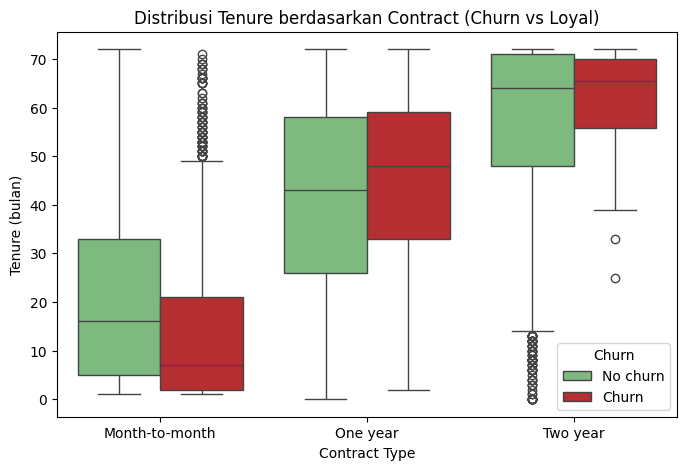

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_plot,
    x="Contract",
    y="tenure",
    hue="Churn",
    palette={"No churn": "#74c476", "Churn": "#cb181d"}
)

plt.title("Distribusi Tenure berdasarkan Contract (Churn vs Loyal)")
plt.xlabel("Contract Type")
plt.ylabel("Tenure (bulan)")
plt.legend(title="Churn")
plt.savefig("Distribusi Tenure berdasarkan Contract (Churn vs Loyal).png", transparent=True, dpi=300)
plt


**Insight**

Berdasarkan analisis, terlihat bahwa kontrak jangka panjang memang diikuti oleh tenure yang lebih lama dan tingkat churn yang lebih rendah, sehingga kontrak menjadi salah satu faktor penting yang membedakan pelanggan yang loyal dengan pelanggan yang berisiko churn. Pelanggan dengan kontrak bulanan cenderung memiliki tenure yang singkat dan tingkat churn yang jauh lebih tinggi, yang menandakan bahwa segmen ini merupakan kelompok paling rentan untuk berhenti berlangganan. Sebaliknya, pelanggan dengan kontrak satu tahun mulai menunjukkan loyalitas yang lebih baik, dengan tenure lebih panjang dan churn yang lebih rendah, sedangkan pelanggan dengan kontrak dua tahun memiliki tenure paling lama serta tingkat churn paling rendah, menjadikannya segmen pelanggan paling stabil dan bernilai tinggi. Dengan demikian, dapat disimpulkan bahwa kontrak bulanan merupakan karakteristik utama pelanggan yang paling berisiko churn, sementara kontrak jangka panjang merupakan ciri khas pelanggan loyal, yang sejalan dengan point utama dalam analisis ini yaitu membedakan segmen berisiko churn dengan segmen loyal.

### **Apakah pelanggan dengan kontrak jangka panjang cenderung memiliki TotalCharges tinggi dan churn rendah?**

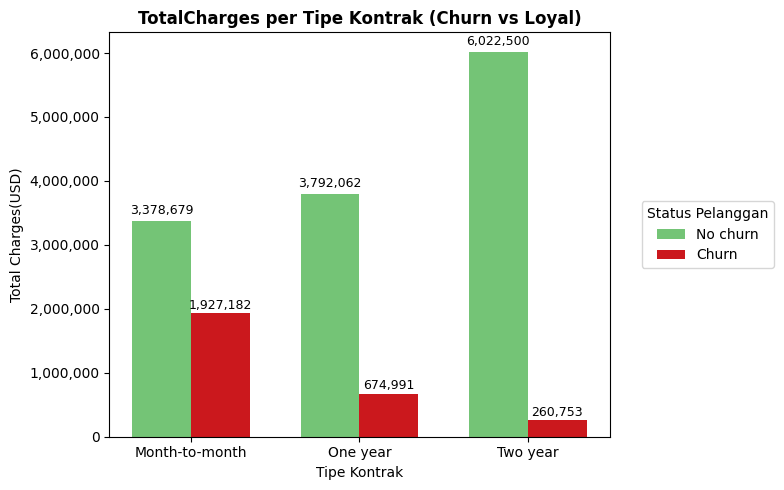

In [21]:
# Copy dataframe
df_plot = df.copy()
df_plot["TotalCharges"] = pd.to_numeric(df_plot["TotalCharges"], errors="coerce")
df_plot = df_plot.dropna(subset=["TotalCharges"])
df_plot["Churn"] = df_plot["Churn"].replace({"Yes": "Churn", "No": "No churn"})

# Hitung total charges per Contract & Churn
summary = df_plot.groupby(["Contract", "Churn"])["TotalCharges"].sum().reset_index()

# Hitung total per kontrak untuk referensi (tidak dipakai lagi utk %)
totals = summary.groupby("Contract")["TotalCharges"].sum().to_dict()

# Side-by-side bar plot
contracts = summary["Contract"].unique()
x = np.arange(len(contracts))
width = 0.35  # lebar batang

fig, ax = plt.subplots(figsize=(8,5))

colors = {"No churn": "#74c476", "Churn": "#cb181d"}

# Plot setiap hue
for i, label in enumerate(["No churn", "Churn"]):
    vals = summary[summary["Churn"]==label].set_index("Contract").loc[contracts]["TotalCharges"]
    ax.bar(x + (i-0.5)*width, vals, width, label=label, color=colors[label])

    # Tambahkan angka total charges di atas batang
    for j, val in enumerate(vals):
        ax.text(j + (i-0.5)*width, val + max(vals)*0.01,
                f"{int(val):,}",   # pakai pemisah ribuan
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(contracts)
ax.set_ylabel("Total Charges(USD)")
ax.set_xlabel("Tipe Kontrak")
ax.set_title("TotalCharges per Tipe Kontrak (Churn vs Loyal)", fontsize=12, fontweight="bold")
ax.legend(title="Status Pelanggan", bbox_to_anchor=(1.05, 0.5), loc='center left')

# Format y-axis supaya angka jelas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

Insight:

Data menunjukkan bahwa siapa yang paling rentan churn adalah pelanggan dengan kontrak jangka pendek (Month-to-month), apa yang membedakan adalah total belanja (TotalCharges) yang jauh lebih rendah dibandingkan pelanggan loyal di kontrak jangka panjang, dan kapan/di mana churn paling besar terjadi adalah pada kontrak bulanan dengan total charges (USD 1.9 juta churn vs 3.4 juta loyal), sedangkan pada kontrak Two year perbedaan sangat mencolok (USD 260 ribu churn vs 6 juta loyal). Pola ini menegaskan bahwa mengapa churn lebih tinggi di kontrak pendek adalah karena komitmen pelanggan rendah dan nilai belanja mereka belum maksimal. perusahaan perlu mendorong pelanggan bulanan untuk naik kelas ke kontrak tahunan melalui insentif harga, bundling, atau loyalty program; langkah ini berpotensi menurunkan churn signifikan sekaligus meningkatkan total pendapatan jangka panjang.

### **Faktor demografis, layanan, atau metode pembayaran mana yang menunjukkan perbedaan churn yang signifikan pada tiap jenis kontrak?** 

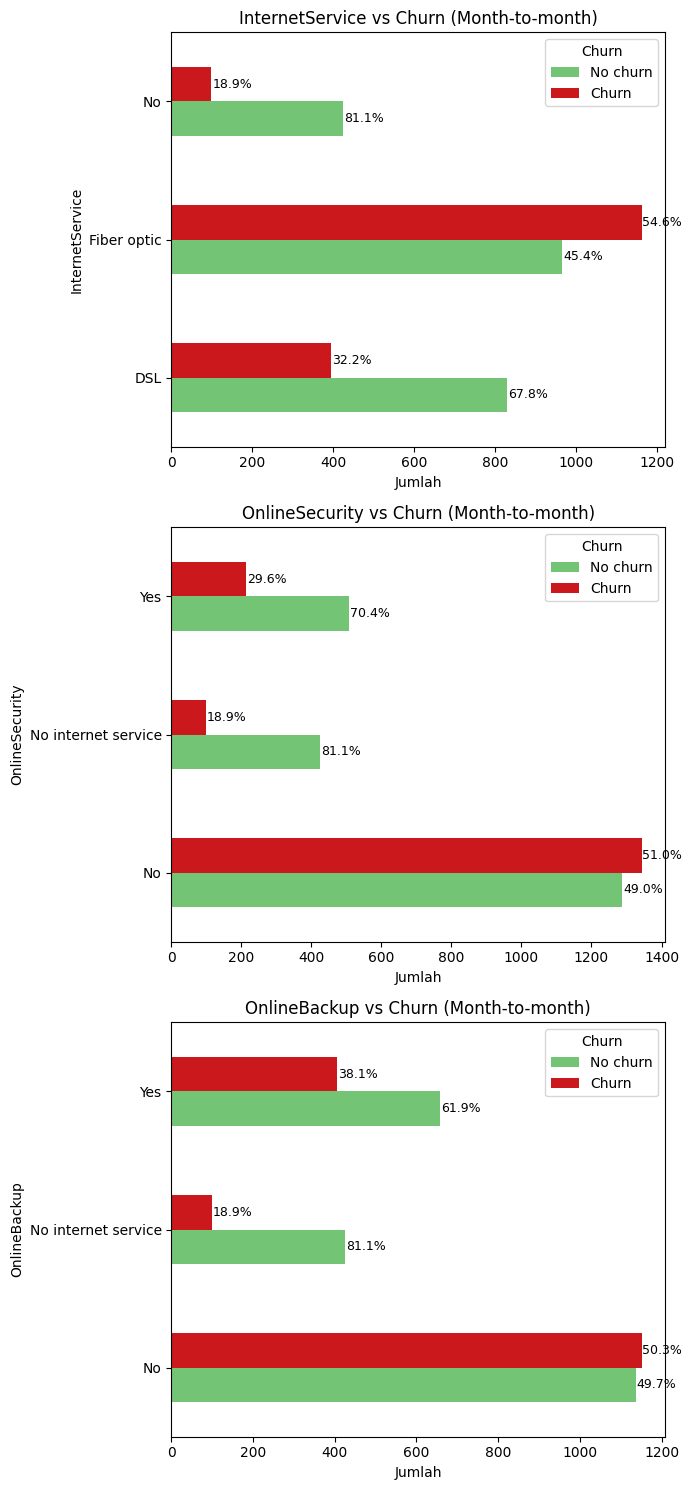

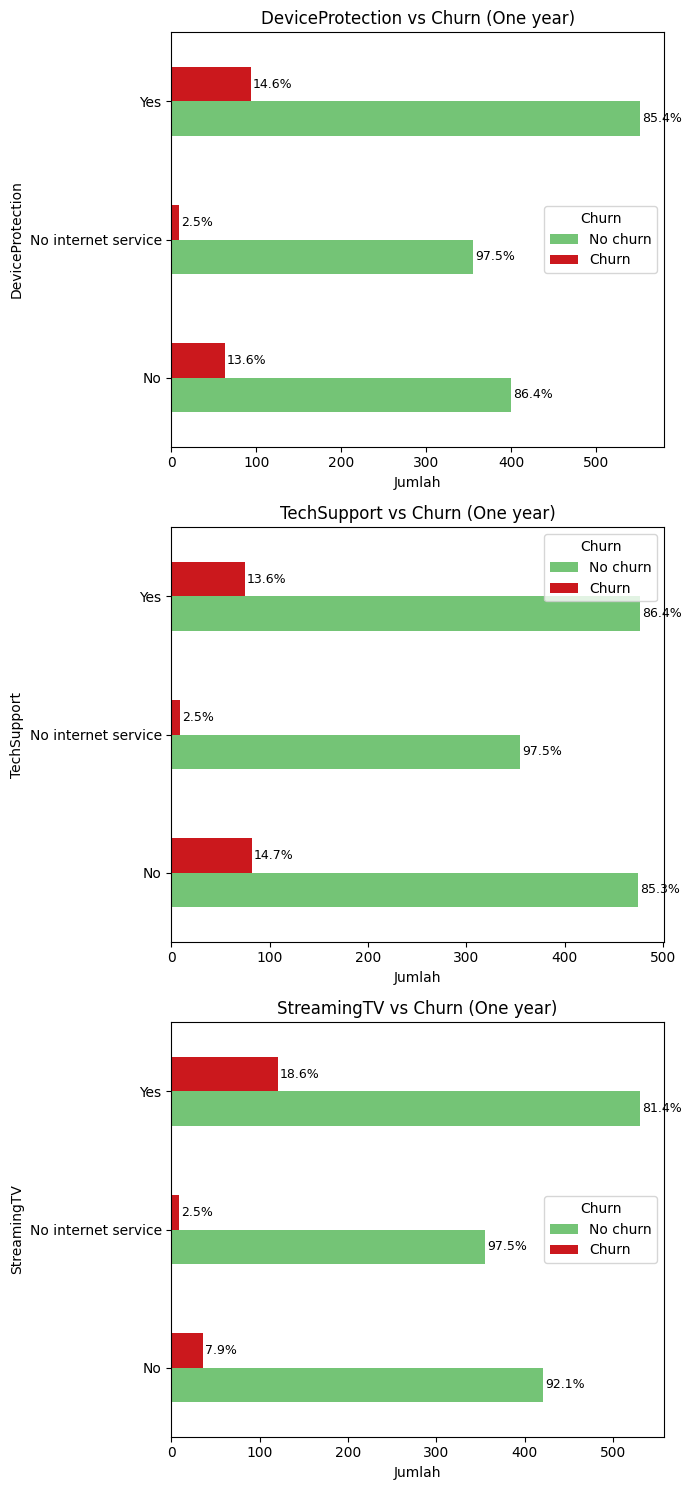

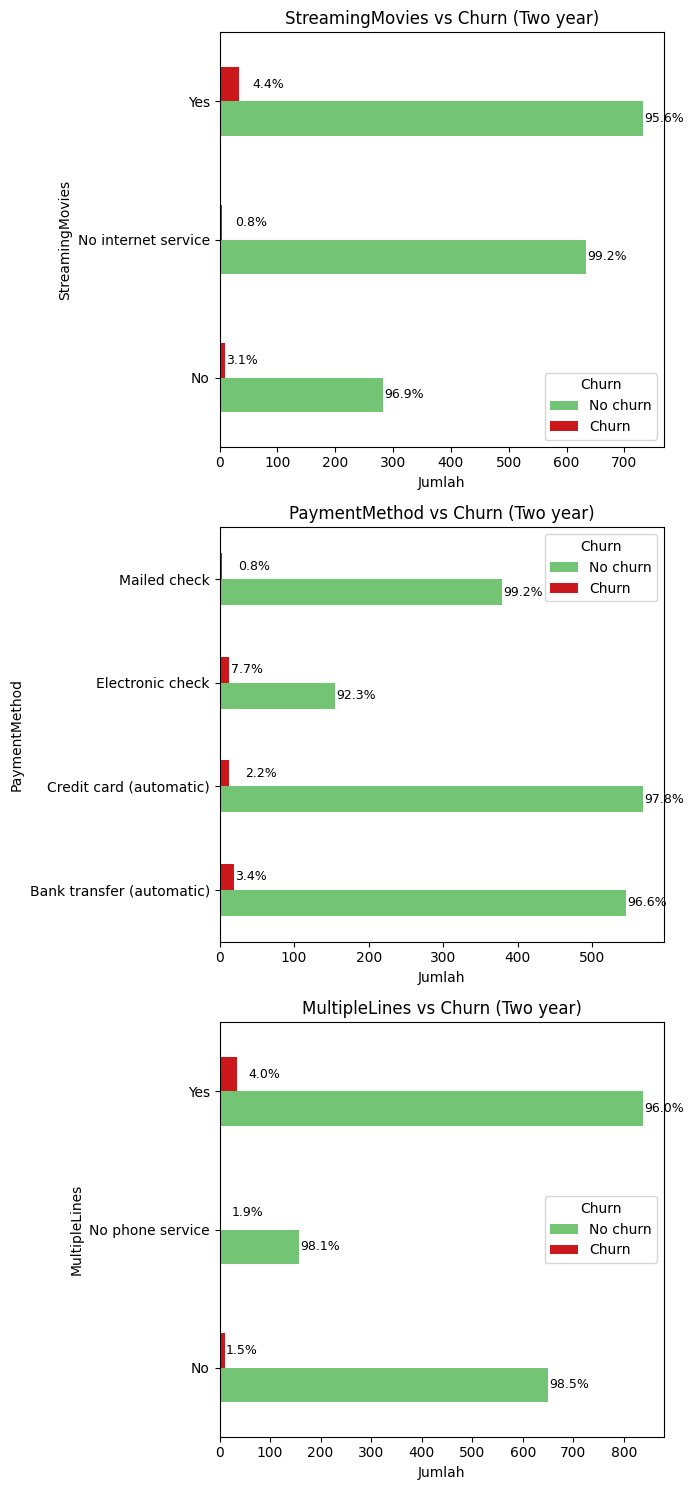

In [22]:
def top_features_by_pct_diff(df, contract="Month-to-month", cat_cols=None, top_n=3,
                            palette={"No churn":"#74c476","Churn":"#cb181d"},
                            used_cols=None):
    if used_cols is None:
        used_cols = set()

    # copy & filter
    dfc = df.copy()
    dfc = dfc[dfc["Contract"].str.strip() == contract].copy()
    dfc["Churn"] = dfc["Churn"].replace({"Yes":"Churn","No":"No churn"})

    if cat_cols is None:
        cat_cols = dfc.select_dtypes(include="object").columns.tolist()
        for drop in ["Contract","Churn","customerID"]:
            if drop in cat_cols: 
                cat_cols.remove(drop)

    # metric: untuk tiap fitur hitung selisih churn vs nonchurn
    metrics = {}
    for col in cat_cols:
        if col in used_cols:  # skip fitur yang sudah dipakai kontrak lain
            continue
        counts = dfc.groupby([col, "Churn"]).size().unstack(fill_value=0)
        for k in ["No churn","Churn"]:
            if k not in counts.columns:
                counts[k] = 0
        totals = counts.sum(axis=1)
        churn_pct = counts["Churn"] / totals * 100
        nonchurn_pct = counts["No churn"] / totals * 100
        pct_diff = (churn_pct - nonchurn_pct).abs()
        metrics[col] = pct_diff.max()

    # pilih top N fitur
    top_cols = sorted(metrics, key=metrics.get, reverse=True)[:top_n]
    used_cols.update(top_cols)  # tandai sudah dipakai

    # plot (horizontal bars)
    fig, axes = plt.subplots(len(top_cols), 1, figsize=(7, 5*len(top_cols)), squeeze=False)
    for ax, col in zip(axes[:,0], top_cols):
        counts = dfc.groupby([col, "Churn"]).size().unstack(fill_value=0)
        for k in ["No churn","Churn"]:
            if k not in counts.columns:
                counts[k] = 0
        counts = counts[["No churn","Churn"]]  # urutan warna konsisten
        totals = counts.sum(axis=1).values

        counts.plot(kind="barh", color=[palette["No churn"], palette["Churn"]], ax=ax)
        ax.set_title(f"{col} vs Churn ({contract})")
        ax.set_xlabel("Jumlah")
        ax.set_ylabel(col)
        ax.legend(title="Churn")

        # annotate persentase (horizontal bar)
        for container in ax.containers:
            x_last = -1e9
            for i, rect in enumerate(container):
                width = rect.get_width()
                if width <= 0: 
                    continue
                y = rect.get_y() + rect.get_height() / 2
                total = totals[i]
                pct = (width / total * 100) if total > 0 else 0

                # posisi label
                x = width + 2
                if abs(x - x_last) < 15:  # cegah tabrakan horizontal
                    x += 20
                ax.text(x, y, f"{pct:.1f}%", va="center", ha="left", fontsize=9)
                x_last = x

    plt.tight_layout()
    plt.show()

    return used_cols

used = set()
used = top_features_by_pct_diff(df, contract="Month-to-month", top_n=3, used_cols=used)
used = top_features_by_pct_diff(df, contract="One year", top_n=3, used_cols=used)
used = top_features_by_pct_diff(df, contract="Two year", top_n=3, used_cols=used)

Insight:

Pada kontrak Month-to-month, churn jelas dipicu oleh layanan inti, terutama pelanggan Fiber Optic (54.6%) dan mereka yang tidak berlangganan online security (51%) maupun online backup (50.3%). Pada kontrak One year, churn dipengaruhi kombinasi layanan pendukung (device protection dan tech support, keduanya sekitar 14%) serta faktor hiburan di mana pelanggan dengan StreamingTV memiliki churn jauh lebih tinggi (18.6%). Sedangkan pada kontrak Two year, pola churn paling menonjol berasal dari metode pembayaran, khususnya Electronic Check (7.7%) yang jauh di atas metode lain, dengan tambahan pengaruh dari hiburan melalui Streaming Movies (4.4%) dan sedikit kontribusi dari Multiple Lines (4.0%). Perusahaan perlu mengarahkan pelanggan Month-to-month Fiber Optic agar berlangganan add-on proteksi (online security/backup), serta mendorong pelanggan Two year beralih dari Electronic Check ke pembayaran otomatis yang berpotensi menurunkan churn.

## **Methodology For Machine Learning**

In [23]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

Pada tahap ini, kolom Churn diubah dari nilai kategori "Yes" dan "No" menjadi angka 1 dan 0 supaya model machine learning bisa memproses data dan belajar memprediksi churn dengan benar.

### **Define X dan y**

In [24]:
X = df.drop(columns=['Churn'])
y = df['Churn']

Pada tahap ini, dataset dipisahkan menjadi X untuk fitur (input) dan y untuk target Churn (output) agar model bisa dilatih untuk mempelajari pola dari fitur dan memprediksi label dengan benar.

### **Data Spliting**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Pada tahap ini, dataset dibagi menjadi data training (X_train, y_train) dan data testing (X_test, y_test) dengan proporsi 80% untuk training dan 20% untuk testing, menggunakan stratify=y agar distribusi target Churn tetap seimbang di kedua subset, sehingga model bisa dilatih pada data training dan dievaluasi performanya secara adil pada data testing.

In [26]:
print('Churn' in X_train.columns)

False


In [27]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [28]:
total = len(y)
perc_0 = (y.value_counts()[0] / total) * 100
perc_1 = (y.value_counts()[1] / total) * 100

print(f"Class 0 (Not Churn): {perc_0:.2f}%")
print(f"Class 1 (Churn): {perc_1:.2f}%")

Class 0 (Not Churn): 73.46%
Class 1 (Churn): 26.54%


Pada data churn ini, jumlah pelanggan yang tidak churn (Class 0) sebesar 73,46% jauh lebih banyak dibandingkan dengan pelanggan yang churn (Class 1) sebesar 26,54%, sehingga terdapat risiko model menjadi bias ke kelas mayoritas. Dalam konteks bisnis, mendeteksi pelanggan yang berpotensi churn jauh lebih penting dibandingkan sekadar memastikan pelanggan yang tidak churn tetap terklasifikasi dengan benar, karena kehilangan pelanggan dapat berdampak langsung pada penurunan pendapatan dan biaya akuisisi pelanggan baru yang lebih tinggi. Oleh karena itu, penelitian ini menggunakan metrik F3-score sebagai evaluasi utama. Metrik ini dipilih karena memberikan bobot lebih besar pada recall namun tetap mempertimbangkan precision, sehingga berbeda dengan recall murni yang hanya fokus menangkap sebanyak mungkin pelanggan churn, F3-score menghindari model asal mengklasifikasikan semua pelanggan sebagai churn hanya demi mendapatkan recall sempurna.

Dengan memaksimalkan F3-score, perusahaan memiliki peluang lebih besar untuk mengidentifikasi pelanggan yang berisiko churn sekaligus menjaga agar strategi retensi tetap efisien. Hal ini memungkinkan tindakan yang lebih tepat sasaran, seperti memberikan promo personalisasi, meningkatkan kualitas layanan, atau menawarkan program loyalitas, sehingga biaya retensi tetap terkendali. Selain itu, pelanggan yang berhasil dipertahankan tidak hanya mencegah hilangnya pendapatan saat ini, tetapi juga meningkatkan nilai jangka panjang (customer lifetime value) serta potensi rekomendasi positif kepada orang lain. Dengan kata lain, fokus pada F3-score membantu perusahaan mencapai keseimbangan: tetap memaksimalkan deteksi churn sambil mengurangi kerugian akibat salah sasaran, sehingga mendukung pertumbuhan dan keberlanjutan bisnis di masa depan.

### **Preprocessing**

Pada tahap preprocessing, data dipersiapkan agar bisa digunakan oleh model machine learning secara efektif dengan beberapa langkah penting, yaitu: pertama, memisahkan fitur dan target, di mana semua kolom kecuali Churn dijadikan X sebagai input, sedangkan kolom Churn dijadikan y sebagai output yang akan diprediksi; kedua, mengubah kolom kategori Churn menjadi angka 0 dan 1, sehingga model bisa memproses data numerik karena sebagian besar algoritma tidak dapat langsung bekerja dengan teks; dan ketiga, membagi dataset menjadi data training dan testing dengan proporsi tertentu serta menggunakan stratifikasi (stratify=y) agar distribusi target tetap seimbang, sehingga model bisa dilatih dengan data yang representatif dan dievaluasi performanya secara adil pada data testing.

In [29]:
# Fitur numerik (skala besar, ada outlier)
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fitur kategorikal
cat_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines',
            'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','Contract',
            'PaperlessBilling','PaymentMethod']

# --- ColumnTransformer ---
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_cols),
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough') 

**Alasan**

Penggunaan RobustScaler dipilih karena memberikan kestabilan yang lebih tinggi dalam proses training model machine learning, terutama pada dataset yang memiliki fitur numerik dengan rentang nilai yang berbeda dan mengandung outlier. RobustScaler bekerja dengan menggunakan median dan interquartile range (IQR) untuk menskalakan fitur, sehingga nilai ekstrem tidak akan mempengaruhi skala fitur secara signifikan. Hal ini menjaga distribusi data numerik tetap representatif dan menghindari distorsi yang dapat menurunkan performa model.

Sementara itu, OneHotEncoder digunakan untuk memastikan representasi fitur kategori menjadi tepat dan bermakna, dengan mengubah setiap kategori menjadi vektor binary (0 atau 1) tanpa memberikan asumsi adanya urutan atau jarak antar kategori. Pendekatan ini memungkinkan model untuk memproses fitur kategori dengan cara yang konsisten dan akurat, serta mencegah interpretasi yang salah terhadap hubungan antar kategori. Selain itu, dengan parameter handle_unknown='ignore', OneHotEncoder dapat menangani kategori baru yang muncul pada data testing tanpa menyebabkan error, sehingga membuat pipeline preprocessing menjadi lebih robust dan aman digunakan pada data nyata di lingkungan produksi.

In [30]:
X_train_Prep = transformer.fit_transform(X_train)
X_test_Prep = transformer.fit_transform(X_test)

In [31]:
X_train_df = pd.DataFrame(X_train_Prep, columns=transformer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_Prep, columns=transformer.get_feature_names_out())
X_train_df

,robust__tenure,robust__MonthlyCharges,robust__TotalCharges,onehot__gender_Female,onehot__gender_Male,onehot__Partner_No,onehot__Partner_Yes,onehot__Dependents_No,onehot__Dependents_Yes,onehot__PhoneService_No,...,onehot__Contract_Month-to-month,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_No,onehot__PaperlessBilling_Yes,onehot__PaymentMethod_Bank transfer (automatic),onehot__PaymentMethod_Credit card (automatic),onehot__PaymentMethod_Electronic check,onehot__PaymentMethod_Mailed check,remainder__SeniorCitizen
0,0.130435,-0.391994,0.089350,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.304348,0.084656,-0.070896,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.347826,-0.551185,-0.234375,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.065217,0.055210,0.148790,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.608696,-0.477571,-0.393368,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.913043,0.713135,1.838931,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5630,-0.586957,-0.449965,-0.382940,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5631,-0.086957,0.594433,0.368579,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5632,-0.108696,-0.922015,-0.265705,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### **Cross-Validation**

Pada tahap Cross-Validation, dataset digunakan untuk mengevaluasi performa model secara lebih stabil dan andal dengan membaginya menjadi beberapa subset (fold), di mana model dilatih pada sebagian fold dan diuji pada fold yang tersisa, kemudian proses ini diulang untuk semua kombinasi fold. Tujuan utamanya adalah mengurangi risiko overfitting, memastikan performa model tidak tergantung pada satu pembagian data tertentu, dan mendapatkan estimasi akurasi atau metrik lain yang lebih representatif dan konsisten. Selain itu, tahap ini juga digunakan untuk memilih model terbaik berdasarkan metrik evaluasi yang diperoleh, sehingga model yang paling akurat dan konsisten bisa dipilih untuk masuk ke tahap selanjutnya, seperti hyperparameter tuning atau deployment.

In [32]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
knn = KNeighborsClassifier() 
tree = DecisionTreeClassifier(random_state=0, max_depth=4)

In [33]:
# voting (ensemble)
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
]) 
voting

VotingClassifier(estimators=[('clf1',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('clf2', KNeighborsClassifier()),
                             ('clf3',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=0))])

In [34]:
# stacking (ensemble)
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg),
        ('clf2', knn),
        ('clf3', tree)
        ],
    final_estimator= logreg
)
stacking

StackingClassifier(estimators=[('clf1',
                                LogisticRegression(max_iter=1000,
                                                   random_state=0)),
                               ('clf2', KNeighborsClassifier()),
                               ('clf3',
                                DecisionTreeClassifier(max_depth=4,
                                                       random_state=0))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=0))

In [35]:
# Bagging
bagging = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=3),
    random_state=0
)

# sdsdsdsdsdsddsdsdsdsddfdsffsdfsdfsdfsdsdsd
rf = RandomForestClassifier(random_state=0) 

# Ada Boost
adaboost = AdaBoostClassifier(random_state=0)

# Gradient Boost
gboost = GradientBoostingClassifier(random_state=0, )

# XGBoost
xgboost = XGBClassifier(random_state=0)

In [36]:
from sklearn.metrics import make_scorer, fbeta_score

f3 = make_scorer(fbeta_score, beta=3)

models = [logreg, knn, tree, voting, stacking, bagging, rf, adaboost, gboost, xgboost] 

cv_mean = []
cv_std = []
cv_all = []

for i in models:
    model_pipe = ImbPipeline([
        ('prep', transformer), 
        ('smote', SMOTE(random_state=0)),
        ('model', i)
    ])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv=5, 
        scoring=f3,
        error_score='raise'
    )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [37]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,"LogisticRegression(max_iter=1000, random_state=0)",0.757377,0.021635,"[0.7854, 0.7724, 0.7633, 0.7394, 0.7262]"
1,KNeighborsClassifier(),0.690629,0.009485,"[0.7015, 0.6755, 0.6892, 0.6999, 0.687]"
2,"DecisionTreeClassifier(max_depth=4, random_sta...",0.685234,0.013968,"[0.6815, 0.698, 0.6991, 0.6607, 0.6869]"
3,"VotingClassifier(estimators=[('clf1',\n ...",0.745324,0.016166,"[0.7584, 0.7438, 0.7673, 0.7218, 0.7354]"
4,"StackingClassifier(estimators=[('clf1',\n ...",0.669713,0.018664,"[0.7029, 0.6569, 0.6491, 0.6649, 0.6748]"
5,BaggingClassifier(estimator=KNeighborsClassifi...,0.650331,0.020831,"[0.6802, 0.6424, 0.642, 0.6665, 0.6206]"
6,RandomForestClassifier(random_state=0),0.568684,0.009903,"[0.5878, 0.5627, 0.5621, 0.5688, 0.5621]"
7,AdaBoostClassifier(random_state=0),0.725781,0.022002,"[0.7598, 0.7389, 0.7122, 0.7221, 0.6959]"
8,GradientBoostingClassifier(random_state=0),0.666735,0.017968,"[0.6971, 0.6693, 0.6691, 0.6436, 0.6547]"
9,"XGBClassifier(base_score=None, booster=None, c...",0.573932,0.030438,"[0.6139, 0.5443, 0.601, 0.5743, 0.5362]"


**Insight**

Berdasarkan tabel di atas, LogisticRegression(max_iter=1000, random_state=0) menunjukkan performa terbaik dengan nilai mean akurasi sebesar 0.757377, yang mengungguli model lain termasuk VotingClassifier dengan mean 0.745324 dan AdaBoostClassifier(random_state=0) dengan mean 0.725781. Logistic Regression juga memiliki deviasi standar yang relatif rendah yaitu 0.021635, menunjukkan performa yang stabil dan konsisten pada berbagai fold.

Walaupun VotingClassifier dan AdaBoostClassifier memiliki performa mendekati pada beberapa fold, Logistic Regression tetap unggul secara keseluruhan baik dari segi akurasi maupun kestabilan. Logistic Regression juga lebih sederhana dan ringan secara komputasi dibandingkan model ensemble seperti VotingClassifier atau StackingClassifier, sehingga lebih efisien untuk proses training maupun prediksi, terutama pada dataset besar atau ketika model harus dijalankan berulang kali di lingkungan produksi.

Dengan kombinasi akurasi tertinggi, kestabilan yang baik, serta efisiensi komputasi, Logistic Regression menjadi pilihan paling optimal dari seluruh kandidat model pada tabel ini.

### **Multicollinearity**

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

def encode_and_vif(df):

    num_cols = df.select_dtypes(include=[np.number])
    cat_cols = df.select_dtypes(include=['object', 'category'])

    if not cat_cols.empty:
        encoder = OneHotEncoder(drop="first", sparse_output=False)
        cat_encoded = encoder.fit_transform(cat_cols)
        cat_encoded_df = pd.DataFrame(
            cat_encoded,
            columns=encoder.get_feature_names_out(cat_cols.columns),
            index=df.index
        )
        X = pd.concat([num_cols, cat_encoded_df], axis=1)
    else:
        X = num_cols.copy()

    X = X.astype(float)

    vif_df = pd.DataFrame()
    vif_df["feature"] = X.columns
    vif_df["VIF"] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
    
    return X, vif_df


In [39]:
X_encoded, vif_result = encode_and_vif(df)

print("Shape setelah encoding:", X_encoded.shape)
print(vif_result)


c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Shape setelah encoding: (7043, 31)
                                  feature          VIF
0                           SeniorCitizen     1.155267
1                                  tenure     7.542762
2                          MonthlyCharges   865.073910
3                            TotalCharges    10.866309
4                                   Churn     1.396953
5                             gender_Male     1.002157
6                             Partner_Yes     1.462703
7                          Dependents_Yes     1.385088
8                        PhoneService_Yes  1771.724417
9          MultipleLines_No phone service    60.985793
10                      MultipleLines_Yes     7.279811
11            InternetService_Fiber optic   148.342004
12                     InternetService_No          inf
13     OnlineSecurity_No internet service          inf
14                     OnlineSecurity_Yes     6.338920
15       OnlineBackup_No internet service          inf
16                       Onlin

In [40]:
cols_to_drop = [
    "StreamingTV_Yes",
    "InternetService_Fiber optic",
    "MonthlyCharges",
    "PhoneService_Yes",
    "MultipleLines_No phone service"
]

X_encoded_dropped = X_encoded.drop(columns=cols_to_drop)

print("Shape setelah drop:", X_encoded_dropped.shape)

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_result_new = calculate_vif(X_encoded_dropped)

print("\nVIF setelah drop kolom-kolom bermasalah:")
print(vif_result_new)


Shape setelah drop: (7043, 26)

VIF setelah drop kolom-kolom bermasalah:
                                  feature        VIF
0                           SeniorCitizen   1.355464
1                                  tenure  15.621893
2                            TotalCharges  14.333938
3                                   Churn   1.687444
4                             gender_Male   1.893216
5                             Partner_Yes   2.809573
6                          Dependents_Yes   1.959667
7                       MultipleLines_Yes   2.342466
8                      InternetService_No        inf
9      OnlineSecurity_No internet service        inf
10                     OnlineSecurity_Yes   1.899813
11       OnlineBackup_No internet service        inf
12                       OnlineBackup_Yes   2.162122
13   DeviceProtection_No internet service        inf
14                   DeviceProtection_Yes   2.276971
15        TechSupport_No internet service        inf
16                        

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

cols_to_drop = [
    "StreamingTV_Yes",
    "InternetService_Fiber optic",
    "MonthlyCharges",
    "PhoneService_Yes",
    "MultipleLines_No phone service",
    "tenure",
    "TotalCharges"
]

X_encoded_dropped = X_encoded.drop(columns=cols_to_drop)

print("Shape setelah drop:", X_encoded_dropped.shape)

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df.values, i) for i in range(df.shape[1])
    ]
    return vif_data

vif_result_new = calculate_vif(X_encoded_dropped)

cols_with_inf_vif = vif_result_new[vif_result_new["VIF"] == float("inf")]["feature"].tolist()
X_encoded_clean = X_encoded_dropped.drop(columns=cols_with_inf_vif)

vif_result_clean = calculate_vif(X_encoded_clean)

print("\nVIF setelah drop kolom-kolom bermasalah:")
print(vif_result_clean)


Shape setelah drop: (7043, 24)


c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF setelah drop kolom-kolom bermasalah:
                                  feature       VIF
0                           SeniorCitizen  1.344084
1                                   Churn  1.659440
2                             gender_Male  1.848524
3                             Partner_Yes  2.659958
4                          Dependents_Yes  1.937178
5                       MultipleLines_Yes  1.982898
6                      OnlineSecurity_Yes  1.739959
7                        OnlineBackup_Yes  1.901571
8                    DeviceProtection_Yes  2.088042
9                         TechSupport_Yes  1.891039
10                    StreamingMovies_Yes  2.256963
11                      Contract_One year  1.546083
12                      Contract_Two year  1.956431
13                   PaperlessBilling_Yes  2.559044
14  PaymentMethod_Credit card (automatic)  1.616362
15         PaymentMethod_Electronic check  2.120048
16             PaymentMethod_Mailed check  1.441151


**Insight**

Berdasarkan hasil perhitungan Variance Inflation Factor (VIF) setelah penghapusan kolom-kolom bermasalah, seluruh fitur yang tersisa memiliki nilai VIF di bawah 5, yang menandakan bahwa multicollinearity antar fitur sudah sangat rendah dan tidak akan menjadi masalah signifikan bagi model Logistic Regression. Nilai VIF tertinggi terdapat pada fitur PaperlessBilling_Yes (2.559) dan MultipleLines_Yes (1.982), yang masih jauh di bawah ambang umum yaitu 5 atau 10, sehingga masih aman untuk digunakan.

Kondisi ini menunjukkan bahwa proses drop fitur yang memiliki VIF tinggi sebelumnya berhasil mengurangi korelasi berlebih antar fitur, sehingga model sekarang memiliki fitur yang lebih independen satu sama lain. Hal ini tidak hanya meningkatkan kestabilan koefisien pada Logistic Regression tetapi juga membuat interpretasi model menjadi lebih jelas dan prediksi menjadi lebih andal.

Dengan kondisi VIF yang rendah ini, model Logistic Regression dapat bekerja secara optimal tanpa terganggu oleh masalah multicollinearity, memastikan hasil prediksi yang lebih stabil dan interpretasi yang lebih akurat.

### **Logistic Regression after Multicollinearity Removal**

In [42]:
features = vif_result_clean["feature"].tolist()

In [43]:
X = X_encoded[features].drop(columns=["Churn"])  
y = X_encoded["Churn"]  

In [44]:
X_train_Cor, X_test_Cor, y_train_Cor, y_test_Cor = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
resamplers = {
    'SMOTE': SMOTE(random_state=0),
    'Random Oversampling': RandomOverSampler(random_state=0)
}

results = {}
benchmark_estimator = None
best_score = 0

for name, sampler in resamplers.items():
    pipeline = ImbPipeline([
        ('resample', sampler),
        ('model', logreg)
    ])
    
    # cross-validation
    scores = cross_val_score(
        pipeline,
        X_train_Cor,
        y_train_Cor,
        cv=5,
        scoring=f3,
        error_score='raise'
    )
    
    mean_score = scores.mean()
    results[name] = mean_score

    if mean_score > best_score:
        best_score = mean_score
        benchmark_estimator = pipeline.fit(X_train_Cor, y_train_Cor)

# hasil
for name, score in results.items():
    print(f"Best {name} Recall: {score}")


Best SMOTE Recall: 0.7455170245879865
Best Random Oversampling Recall: 0.7573949829125342


| Resampling          | Score          | 
| ------------------- | -------------- |
| Smote               | 0.745517       | 
| Random Oversampling | 0.757394       | 

**Insight**

Berdasarkan tabel di atas, penggunaan teknik Random Oversampling memberikan skor yang sedikit lebih tinggi yaitu 0.757394 dibandingkan SMOTE yang menghasilkan skor 0.745517. Hal ini menunjukkan bahwa dalam kasus ini Random Oversampling cenderung sedikit lebih efektif dalam meningkatkan performa model dibandingkan SMOTE meskipun perbedaannya tidak terlalu besar.

Keunggulan Random Oversampling terletak pada kesederhanaannya yaitu dengan menyalin data sampel minoritas yang sudah ada sehingga distribusi data lebih seimbang tanpa menambah kompleksitas proses preprocessing. Sementara itu, SMOTE membentuk sampel minoritas sintetis melalui interpolasi antar sampel minoritas yang dapat meningkatkan variasi data, namun dalam kasus ini hasilnya sedikit lebih rendah dibanding Random Oversampling.

Dengan demikian, Random Oversampling menunjukkan sedikit keunggulan dalam meningkatkan performa model untuk dataset ini, namun perbedaan dengan SMOTE relatif kecil sehingga kedua metode masih layak dipertimbangkan tergantung pada kebutuhan dan kompleksitas proyek.

### **Hyperparameter Tunning**

Pada tahap Hyperparameter Tuning, model yang telah dipilih dari tahap cross-validation disempurnakan dengan mencari kombinasi parameter terbaik yang mengontrol perilaku algoritma, seperti kedalaman pohon, jumlah estimators, atau learning rate. Tujuannya adalah untuk memaksimalkan performa model tanpa overfitting dengan cara mencoba berbagai set hyperparameter, biasanya melalui teknik seperti Grid Search atau Random Search, sehingga model akhir yang digunakan untuk prediksi memiliki akurasi dan stabilitas yang optimal.

In [46]:
# Pipeline
model_pipe_logreg = ImbPipeline([
    ('resample', RandomOverSampler(random_state=0)), 
    ('model', LogisticRegression(random_state=0))
])

hyperparam_logreg = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['saga'],  
    'model__max_iter': [100, 200, 500],
    'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
}

RandomizedSearchCV_logreg_tunning = RandomizedSearchCV(
    estimator=model_pipe_logreg,
    param_distributions=hyperparam_logreg,
    cv=5,
    scoring=f3,
    n_jobs=-1,
    n_iter=500,
    random_state=0
)

In [47]:
RandomizedSearchCV_logreg_tunning.fit(X_train_Cor, y_train_Cor)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 360 is smaller than n_iter=500. Running 360 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resample',
                                              RandomOverSampler(random_state=0)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__C': [0.001, 0.01, 0.1, 1, 10,
                                                     100],
                                        'model__l1_ratio': [0, 0.25, 0.5, 0.75,
                                                            1],
                                        'model__max_iter': [100, 200, 500],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet', None],
                                        'model__solver': ['saga']},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [48]:
RandomizedSearchCV_logreg_tunning.best_params_

{'model__solver': 'saga',
 'model__penalty': 'l1',
 'model__max_iter': 100,
 'model__l1_ratio': 0,
 'model__C': 1}

In [49]:
hyperparam_logreg = {
    'model__solver': ['saga'],             
    'model__penalty': ['l2'],              
    'model__max_iter': [98, 99, 100, 101, 102], 
    'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'model__C': [0.5, 1, 1.5]              
}


model_pipe_logreg = ImbPipeline([
    ('resample', RandomOverSampler(random_state=0)),
    ('model', LogisticRegression(random_state=0))])

GridSearchCV_logreg_tunning = GridSearchCV( 
    estimator= model_pipe_logreg,
    param_grid= hyperparam_logreg,
    cv= 5,
    scoring=f3,
    n_jobs=-1,
)
GridSearchCV_logreg_tunning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 1.5],
                         'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l2'], 'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [50]:
GridSearchCV_logreg_tunning.fit(X_train_Cor, y_train_Cor)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 1.5],
                         'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l2'], 'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [51]:
GridSearchCV_logreg_tunning.best_score_

np.float64(0.7575364268198047)

In [52]:
tunning_estimator = GridSearchCV_logreg_tunning.best_estimator_

| Model              | Benchmark      | Sesudah Tuning |
| ------------------ | -------------- | -------------- |
| LogisticRegression | 0.757394       | 0.757536       |

**Insight**

Dari tabel di atas terlihat bahwa performa LogisticRegression mengalami peningkatan setelah dilakukan tuning, dari 0.757394 menjadi 0.757536. Meskipun kenaikannya tidak besar, hal ini menunjukkan bahwa proses tuning memberikan perbaikan pada model. Peningkatan tersebut berarti model menjadi sedikit lebih optimal dalam memprediksi data, sekaligus menjaga kestabilan dan kemampuan generalisasi ketika bekerja dengan data baru. Ini juga menunjukkan bahwa model sudah berada pada kondisi yang cukup baik sehingga perbaikan dari tuning bersifat lebih halus, namun tetap memberikan nilai tambah pada performa akhir model.


### **Optimasi Model**

Tahap Optimasi Model adalah proses di mana kita melakukan penyempurnaan dan penyesuaian model machine learning untuk mencapai performa terbaiknya, dengan cara mengevaluasi dan mengubah berbagai komponen seperti pemilihan fitur, transformasi data, binning, scaling, serta pengaturan parameter atau hyperparameter model, sehingga model dapat mempelajari pola dari data secara lebih efektif, mengurangi kesalahan prediksi, mencegah overfitting, dan meningkatkan kemampuan generalisasi ke data baru, sambil tetap mempertimbangkan efisiensi komputasi dan interpretabilitas model.

#### **Feature Selection**

Tahap Feature Selection dalam machine learning adalah proses di mana kita menilai dan memilih fitur-fitur yang paling relevan dari dataset untuk digunakan dalam pembangunan model, dengan tujuan membuat model lebih fokus pada informasi yang penting, meningkatkan akurasi prediksi, mengurangi risiko overfitting, mempercepat proses pelatihan, dan membuat model lebih mudah digeneralisasi ke data baru. Pada tahap ini, fitur-fitur yang tidak relevan, redundan, atau hampir konstan akan dihapus sehingga dataset menjadi lebih ringkas dan model dapat bekerja secara lebih optimal.

In [53]:
kbest = SelectKBest(k=7)

**Alasannya**

Saya menggunakan SelectKBest karena metode ini efektif memilih fitur yang paling relevan dan memiliki hubungan kuat dengan target, sehingga meningkatkan akurasi, mengurangi noise, dan menurunkan risiko overfitting. Pemilihan k = 7 dilakukan untuk mendapatkan keseimbangan optimal antara akurasi model dan kompleksitasnya. Semua fitur yang tersisa memiliki VIF rendah (< 5), sehingga tidak ada hambatan teknis memilih k yang relatif besar. Dengan 7 fitur terbaik, model diharapkan tetap akurat, stabil, dan lebih efisien dalam proses training.

In [54]:
kbest.fit(X_train_Cor, y_train_Cor)

X_train_kbest = kbest.transform(X_train_Cor)
X_test_kbest = kbest.transform(X_train_Cor)

In [55]:
selected_features = X_train_Cor.columns[kbest.get_support()]
print("Fitur terpilih setelah SelectKBest:")
print(selected_features)

Fitur terpilih setelah SelectKBest:
Index(['Dependents_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [56]:
hyperparam_logreg = {
    'model__solver': ['saga'],             
    'model__penalty': ['l2'],              
    'model__max_iter': [98, 99, 100, 101, 102], 
    'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'model__C': [0.5, 1, 1.5]              
}

model_pipe_logreg = ImbPipeline([ 
    ('select', kbest),
    ('resample', RandomOverSampler(random_state=0)),
    ('model', LogisticRegression(random_state=0))])

GridSearchCV_tunning_Kbest = GridSearchCV( 
    estimator= model_pipe_logreg,
    param_grid= hyperparam_logreg,
    cv= 5,
    scoring=f3,
    n_jobs=-1,
)
GridSearchCV_tunning_Kbest

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest(k=7)),
                                       ('resample',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 1.5],
                         'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l2'], 'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [57]:
GridSearchCV_tunning_Kbest.fit(X_train_Cor, y_train_Cor)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest(k=7)),
                                       ('resample',
                                        RandomOverSampler(random_state=0)),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 1.5],
                         'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l2'], 'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [58]:
GridSearchCV_tunning_Kbest.best_score_

np.float64(0.7733108638268615)

In [59]:
kbest_estimator = GridSearchCV_tunning_Kbest.best_estimator_

#### **Binning**

In [60]:
hyperparam_logreg = {
    'model__solver': ['saga'],             
    'model__penalty': ['l2'],              
    'model__max_iter': [98, 99, 100, 101, 102], 
    'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'model__C': [0.5, 1, 1.5]              
}

model_pipe_logreg = ImbPipeline([
    ('resample', RandomOverSampler(random_state=0)),
    ('binning', KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')),
    ('model', LogisticRegression(random_state=0))])

# random forest
GridSearchCV_tunning_binning = GridSearchCV( 
    estimator= model_pipe_logreg,
    param_grid= hyperparam_logreg,
    cv= 5,
    scoring=f3,
    n_jobs=-1,
)
GridSearchCV_tunning_binning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample',
                                        RandomOverSampler(random_state=0)),
                                       ('binning',
                                        KBinsDiscretizer(encode='onehot-dense',
                                                         strategy='uniform')),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 1.5],
                         'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l2'], 'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [61]:
GridSearchCV_tunning_binning.fit(X_train_Cor, y_train_Cor)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample',
                                        RandomOverSampler(random_state=0)),
                                       ('binning',
                                        KBinsDiscretizer(encode='onehot-dense',
                                                         strategy='uniform')),
                                       ('model',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 1.5],
                         'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l2'], 'model__solver': ['saga']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [62]:
GridSearchCV_tunning_binning.best_score_

np.float64(0.7574870156163275)

In [63]:
binning_estimator = GridSearchCV_tunning_binning.best_estimator_

| Model                 | Benchmark    | Tunning         | Binning          | Feature Selection    | 
| --------------------- | ------------ | --------------- | ---------------- | -------------------- |
| logistic regression   | 0.757394     | 0.757536        | 0.757487         | 0.773310            |

**Insight**

Berdasarkan tabel di atas, performa Logistic Regression pada test set menunjukkan:

- Benchmark: 0.757394 → menjadi titik awal pengukuran performa model.

- Tuning: 0.757536 → memberikan sedikit peningkatan performa dibanding benchmark, menunjukkan bahwa tuning hyperparameter mampu menyempurnakan model walaupun peningkatannya kecil.

- Binning: 0.757487 → performanya hampir setara dengan tuning, hanya sedikit lebih rendah, namun tetap lebih baik daripada benchmark.

- Feature Selection: 0.773310 → memberikan peningkatan performa paling signifikan dibanding semua tahap sebelumnya, menunjukkan bahwa memilih fitur terbaik membantu model fokus pada informasi paling relevan sehingga meningkatkan akurasi secara nyata.

Dengan demikian, hasil ini menunjukkan bahwa Feature Selection dengan SelectKBest memberikan kontribusi peningkatan performa terbesar untuk Logistic Regression, sedangkan tuning hyperparameter dan binning memberikan peningkatan yang relatif kecil.


### **Predict to Test Set**

In [64]:
y_pred_base = benchmark_estimator.predict(X_test_Cor)
y_pred_tunning = tunning_estimator.predict(X_test_Cor)
y_pred_kbest = kbest_estimator.predict(X_test_Cor)
y_pred_binning = binning_estimator.predict(X_test_Cor)

In [65]:
f3_benchmark = fbeta_score(y_test_Cor, y_pred_base, beta=3)
f3_tunning = fbeta_score(y_test_Cor, y_pred_tunning, beta=3)
f3_kbest = fbeta_score(y_test_Cor, y_pred_kbest, beta=3)
f3_binning = fbeta_score(y_test_Cor, y_pred_binning, beta=3)

In [66]:
print(f'Benchmark Score = {f3_benchmark}')
print(f'Tunning Score = {f3_tunning}')
print(f'Kbest Score = {f3_kbest}')
print(f'Binning Score = {f3_binning}')

Benchmark Score = 0.7393577296489918
Tunning Score = 0.7393577296489918
Kbest Score = 0.7680945347119645
Binning Score = 0.7393577296489918


**Train Set**

| Model                 | Benchmark    | Tunning         | Binning          | Feature Selection    | 
| --------------------- | ------------ | --------------- | ---------------- | -------------------- |
| logistic regression   | 0.757394     | 0.757536        | 0.757487         | 0.773310            |

**Test Set**

| Model                 | Benchmark    | Tunning         | Binning          | Feature Selection    | 
| --------------------- | ------------ | --------------- | ---------------- | -------------------- |
| logistic regression   | 0.739357     | 0.739357        | 0.739357         | 0.768094             |

**Insight**

Berdasarkan hasil evaluasi pada tabel di atas, terlihat bahwa pada train set, performa Logistic Regression mengalami peningkatan paling besar pada tahap Feature Selection dengan skor 0.773310, dibandingkan benchmark sebesar 0.757394. Tuning hyperparameter hanya memberikan sedikit peningkatan menjadi 0.757536, sedangkan binning menunjukkan hasil hampir sama dengan benchmark yaitu 0.757487. Hal ini menunjukkan bahwa pada data pelatihan, Feature Selection mampu membantu model lebih fokus pada fitur penting sehingga akurasi meningkat secara nyata.

Pada test set, hasilnya menunjukkan bahwa benchmark, tuning, dan binning sama-sama menghasilkan skor 0.739357, sehingga tidak memberikan perbedaan berarti terhadap performa model pada data baru. Sebaliknya, Feature Selection kembali memberikan peningkatan cukup signifikan dengan skor 0.768094, lebih tinggi dibandingkan baseline maupun metode optimasi lainnya. Ini membuktikan bahwa pemilihan fitur yang tepat bukan hanya meningkatkan performa pada data latih, tetapi juga membantu model lebih mampu melakukan generalisasi pada data uji.

Dengan demikian, dapat disimpulkan bahwa meskipun tuning dan binning tidak memberikan dampak yang berarti, Feature Selection merupakan strategi optimasi paling efektif, karena terbukti meningkatkan kinerja model baik pada train set maupun test set, sekaligus memperkuat kemampuan generalisasi model terhadap data nyata.

### **Coef (Odd Ratio)**

In [83]:
import statsmodels.api as sm
X_train_add = sm.add_constant(X_train_Cor)

In [84]:
logit = sm.Logit(y_train_Cor,X_train_add)

model_fit = logit.fit()
print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.444915
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5617
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                  0.2310
Time:                        22:08:08   Log-Likelihood:                -2506.6
converged:                       True   LL-Null:                       -3259.7
Covariance Type:            nonrobust   LLR p-value:                2.397e-311
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0088      

In [85]:
import numpy as np
import pandas as pd

# Coefficient dari output regresi logistik
coef_dict = {
    "SeniorCitizen": 0.2027,
    "gender_Male": -0.0041,
    "Partner_Yes": -0.1502,
    "Dependents_Yes": -0.2721,
    "MultipleLines_Yes": 0.2710,
    "OnlineSecurity_Yes": -0.4693,
    "OnlineBackup_Yes": -0.2415,
    "DeviceProtection_Yes": 0.0355,
    "TechSupport_Yes": -0.3053,
    "StreamingMovies_Yes": 0.4510,
    "Contract_One year": -1.4815,
    "Contract_Two year": -2.6626,
    "PaperlessBilling_Yes": 0.5514,
    "PaymentMethod_Credit card (automatic)": -0.0381,
    "PaymentMethod_Electronic check": 0.6766,
    "PaymentMethod_Mailed check": 0.0413
}

# Hitung Odds Ratio dan interpretasi
results = []
for var, beta in coef_dict.items():
    OR = np.exp(beta)
    results.append([var, beta, OR])

df_or = pd.DataFrame(results, columns=["Variable", "Coef", "Odds Ratio"])

df_or["Interpretasi"] = df_or["Odds Ratio"].apply(
    lambda x: "Meningkatkan risiko churn" if x > 1 else "Menurunkan risiko churn"
)

print(df_or)


                                 Variable    Coef  Odds Ratio  \
0                           SeniorCitizen  0.2027    1.224705   
1                             gender_Male -0.0041    0.995908   
2                             Partner_Yes -0.1502    0.860536   
3                          Dependents_Yes -0.2721    0.761778   
4                       MultipleLines_Yes  0.2710    1.311275   
5                      OnlineSecurity_Yes -0.4693    0.625440   
6                        OnlineBackup_Yes -0.2415    0.785449   
7                    DeviceProtection_Yes  0.0355    1.036138   
8                         TechSupport_Yes -0.3053    0.736902   
9                     StreamingMovies_Yes  0.4510    1.569881   
10                      Contract_One year -1.4815    0.227296   
11                      Contract_Two year -2.6626    0.069767   
12                   PaperlessBilling_Yes  0.5514    1.735681   
13  PaymentMethod_Credit card (automatic) -0.0381    0.962617   
14         PaymentMethod_

- SeniorCitizen (β = 0.2027, Odds Ratio = 1.2247, signifikan, p = 0.025)  
  → Variabel ini meningkatkan risiko churn sekitar 22.47% (pelanggan lansia lebih rentan berhenti).  

- gender_Male (β = -0.0041, Odds Ratio = 0.9959, tidak signifikan, p = 0.952)  
  → Variabel ini menurunkan risiko churn sekitar 0.41%, namun tidak berpengaruh berarti.  

- Partner_Yes (β = -0.1502, Odds Ratio = 0.8605, tidak signifikan, p = 0.065)  
  → Variabel ini menurunkan risiko churn sekitar 13.95%, pelanggan dengan pasangan lebih loyal meski efeknya lemah.  

- Dependents_Yes (β = -0.2721, Odds Ratio = 0.7618, signifikan, p = 0.005)  
  → Variabel ini menurunkan risiko churn sekitar 23.82%, pelanggan dengan tanggungan lebih cenderung bertahan.  

- MultipleLines_Yes (β = 0.2710, Odds Ratio = 1.3113, signifikan, p = 0.000)  
  → Variabel ini meningkatkan risiko churn sekitar 31.13%, pelanggan dengan banyak line lebih berisiko churn.  

- OnlineSecurity_Yes (β = -0.4693, Odds Ratio = 0.6254, signifikan, p = 0.000)  
  → Variabel ini menurunkan risiko churn sekitar 37.46%, pelanggan dengan layanan keamanan lebih loyal.  

- OnlineBackup_Yes (β = -0.2415, Odds Ratio = 0.7854, signifikan, p = 0.003)  
  → Variabel ini menurunkan risiko churn sekitar 21.46%, pelanggan dengan backup online lebih bertahan.  

- DeviceProtection_Yes (β = 0.0355, Odds Ratio = 1.0361, tidak signifikan, p = 0.674)  
  → Variabel ini meningkatkan risiko churn sekitar 3.61%, efeknya tidak signifikan.  

- TechSupport_Yes (β = -0.3053, Odds Ratio = 0.7369, signifikan, p = 0.001)  
  → Variabel ini menurunkan risiko churn sekitar 26.31%, pelanggan dengan support teknis lebih loyal.  

- StreamingMovies_Yes (β = 0.4510, Odds Ratio = 1.5699, signifikan, p = 0.000)  
  → Variabel ini meningkatkan risiko churn sekitar 56.99%, pelanggan streaming film lebih berisiko churn.  

- Contract_One year (β = -1.4815, Odds Ratio = 0.2273, signifikan, p = 0.000)  
  → Variabel ini menurunkan risiko churn sekitar 77.27%, kontrak 1 tahun membuat pelanggan jauh lebih loyal.  

- Contract_Two year (β = -2.6626, Odds Ratio = 0.0698, signifikan, p = 0.000)  
  → Variabel ini menurunkan risiko churn sekitar 93.02%, kontrak 2 tahun adalah faktor paling kuat menahan churn.  

- PaperlessBilling_Yes (β = 0.5514, Odds Ratio = 1.7357, signifikan, p = 0.000)  
  → Variabel ini meningkatkan risiko churn sekitar 73.57%, pelanggan dengan paperless billing lebih rawan churn.  

- PaymentMethod_Credit card (automatic) (β = -0.0381, Odds Ratio = 0.9626, tidak signifikan, p = 0.758)  
  → Variabel ini menurunkan risiko churn sekitar 3.74%, namun pengaruhnya tidak signifikan.  

- PaymentMethod_Electronic check (β = 0.6766, Odds Ratio = 1.9672, signifikan, p = 0.000)  
  → Variabel ini meningkatkan risiko churn sekitar 96.72%, pelanggan dengan metode e-check hampir dua kali lipat lebih berisiko churn.  

- PaymentMethod_Mailed check (β = 0.0413, Odds Ratio = 1.0422, tidak signifikan, p = 0.730)  
  → Variabel ini meningkatkan risiko churn sekitar 4.22%, efeknya tidak signifikan.  


### **Threshold Optimization**

In [86]:
from sklearn.metrics import fbeta_score

kbest_estimator.fit(X_train_Cor, y_train_Cor)
y_pred_proba = kbest_estimator.predict_proba(X_test_Cor)[:, 1]

list_threshold = np.arange(0.01, 1.00, 0.01)
best_thresh = 0.5
best_f3 = 0
list_f3 = []

for threshold in list_threshold:
    y_pred_class = (y_pred_proba >= threshold).astype(int)
    score = fbeta_score(y_test_Cor, y_pred_class, beta=3)
    list_f3.append(score)
    if score > best_f3:
        best_f3 = score
        best_thresh = threshold

print(f"Threshold terbaik: {best_thresh:.2f}")
print(f"F3-score terbaik: {best_f3:.4f}")


Threshold terbaik: 0.21
F3-score terbaik: 0.8260


c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [87]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f3 score'] = list_f3

df_th.head()

,threshold,f3 score
0,0.01,0.783246
1,0.02,0.783246
2,0.03,0.783246
3,0.04,0.784976
4,0.05,0.790144


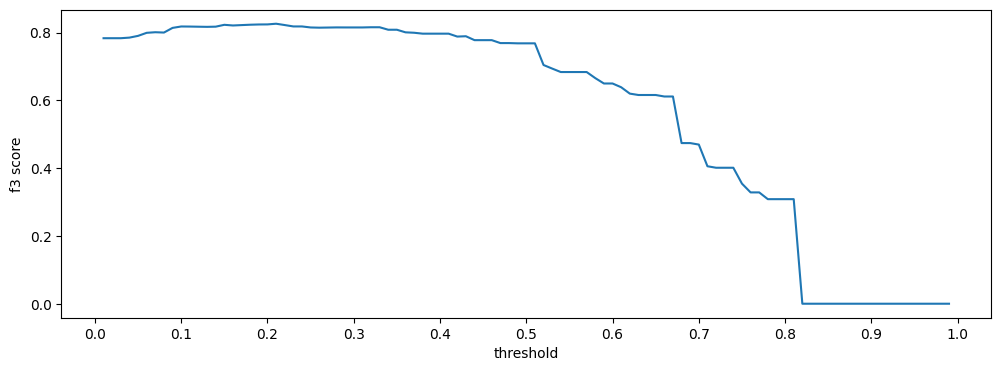

In [88]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_th, x='threshold', y="f3 score")
plt.xticks(np.arange(0,1.1, 0.1));

In [89]:
# best threshold
df_th.sort_values(by='f3 score', ascending=False).head(1)

,threshold,f3 score
20,0.21,0.825966


In [90]:
# fit
kbest_estimator.fit(X_train_Cor, y_train_Cor)

# predict
y_pred_proba = kbest_estimator.predict_proba(X_test_Cor)[:, 1] 

y_pred_optimized = np.where(y_pred_proba> 0.21, 1, 0) 

fbeta_score(y_test_Cor, y_pred_optimized, beta=3)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


0.8259655653792461

| Model                 | FiturSelection  | threshold (0.21)  |
| --------------------- |--------------- | ---------------- |
| logistic regression   | 0.768094        | 0.825965        |

**Insight**

Berdasarkan tabel di atas, penerapan threshold sebesar 0.21 pada model Logistic Regression dengan fitur selection meningkatkan skor dari 0.768094 menjadi 0.825965 pada test set. Hal ini menunjukkan bahwa kombinasi fitur selection dan penyesuaian threshold dapat secara signifikan meningkatkan kemampuan model dalam mendeteksi pelanggan yang berpotensi churn, membuat model lebih sensitif, serta membantu meminimalkan risiko kehilangan pelanggan yang seharusnya dipertahankan.


### **Confusion Matrix**

In [91]:
cm = confusion_matrix(y_test_Cor, y_pred_optimized)
cm

array([[458, 577],
       [ 19, 355]])

<Axes: >

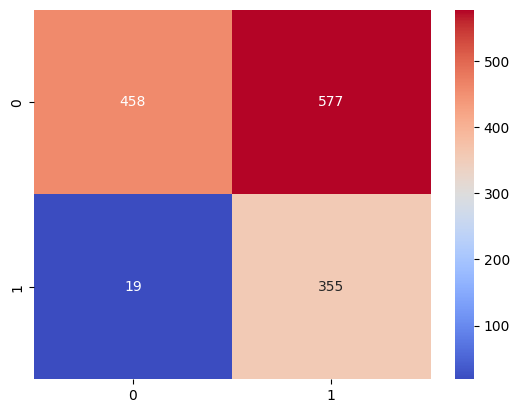

In [92]:
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')

|               | Predicted (0) | Predicted (1) |
| :-----------: | :-----------: | :-----------: |
| Actual (0)    | 458             | 577          |
| Actual (1)    | 19            | 355           |


Positive class (1) = Churn → pelanggan benar-benar berhenti/langganannya putus.

Negative class (0) = Non-churn → pelanggan tetap bertahan.

- True Positive (TP) = 458 → benar churn

- False Negative (FN) = 19 → sebenarnya churn tapi diprediksi loyal

- False Positive (FP) = 577 → sebenarnya loyal tapi diprediksi churn

- True Negative (TN) = 355 → benar loyal

-   Cost Analysis Before Implementing Machine Learning for Churn Prediction

    - Skenario 1 – Mengasumsikan Semua Pelanggan tetap

        |               | Predicted (0) | Predicted (1) |
        | :-----------: | :-----------: | :-----------: |
        | Actual (0)    | 1.035             | 0          |
        | Actual (1)    | 374            | 0           |

        Biaya akuisisi per pelanggan baru: $200

        Total pelanggan yang churn: 19 + 355 = 374

        Total biaya: 374 × $200 = $74,800

    - Skenario 2 – Mengasumsikan Semua Pelanggan Akan churn

        |               | Predicted (0) | Predicted (1) |
        | :-----------: | :-----------: | :-----------: |
        | Actual (0)    | 0             | 1.035          |
        | Actual (1)    | 0            | 374           |

        Biaya retensi per pelanggan : $60

        Total pelanggan yang churn: 458 + 577 = 1.035

        Total biaya: 1.035 × $60 = $62.100


**Insight**

Analisis biaya sebelum penerapan machine learning menunjukkan bahwa kedua skenario ekstrem sama-sama tidak efisien.
Jika semua pelanggan dianggap loyal, perusahaan harus menanggung biaya akuisisi tinggi ($74,800) karena banyak pelanggan yang churn tidak terdeteksi.
Sebaliknya, jika semua pelanggan dianggap churn, perusahaan akan mengeluarkan biaya retensi berlebih ($62,100) untuk pelanggan yang sebenarnya loyal.

Oleh karena itu, fokus utama perusahaan sebaiknya adalah menekan jumlah False Negative (FN),
karena kesalahan dalam tidak mendeteksi pelanggan churn menimbulkan biaya akuisisi yang jauh lebih besar dibandingkan biaya retensi akibat pelanggan salah sasaran.




- Cost Analysis after Implementing Machine Learning for Churn Prediction

    Dengan bantuan model machine learning, perusahaan dapat lebih akurat mengidentifikasi pelanggan yang berisiko churn dan memfokuskan program retensi hanya pada pelanggan dengan risiko tinggi.

    False Positives (577): Diprediksi churn tetapi loyal → diberikan program retensi
    Biaya = $60 × 577 = $34.620

    False Negatives (19): Diprediksi loyal tetapi sebenarnya churn → perlu akuisisi ulang
    Biaya = $200 × 19 = $3.800

    Total Pengluaran perusahaan : $34.620 + $3.800 = $38.420


**Insight**

Berdasarkan analisis biaya setelah implementasi machine learning untuk prediksi churn, terlihat bahwa penggunaan model memungkinkan perusahaan untuk lebih tepat menargetkan program retensi kepada pelanggan dengan risiko tinggi. Meskipun terdapat False Positives sebanyak 577 pelanggan yang sebenarnya loyal sehingga menimbulkan biaya retensi sebesar $34.620, jumlah ini jauh lebih kecil dibandingkan biaya potensial jika semua pelanggan dianggap berisiko churn. False Negatives berjumlah 19 pelanggan yang seharusnya ditangani namun tidak terdeteksi, menghasilkan biaya akuisisi ulang sebesar $3.800. Dengan total biaya $38.420, strategi berbasis model machine learning terbukti lebih efisien dibandingkan pendekatan tanpa model, karena dapat mengurangi biaya keseluruhan sekaligus meningkatkan fokus program retensi.

### **Conclusion and Recommendation**

#### **Conclusion**

Implementasi machine learning dalam prediksi churn terbukti efektif dalam mengidentifikasi pelanggan berisiko tinggi, sehingga program retensi dapat dilakukan secara lebih terfokus. Meskipun masih terdapat biaya akibat False Positives dan False Negatives, total pengeluaran perusahaan ($38.420) jauh lebih rendah dibandingkan jika semua pelanggan ditangani tanpa model. Hal ini menunjukkan bahwa penggunaan model prediksi churn tidak hanya meningkatkan efisiensi operasional tetapi juga membantu mengoptimalkan anggaran retensi pelanggan.

#### **Recommendation**

- Disarankan untuk menerapkan model Logistic Regression hasil proses tuning dan feature selection sebagai pendekatan utama dalam prediksi churn, mengingat model ini menunjukkan performa yang optimal dan stabil.

- Penyesuaian threshold prediksi ke nilai 0.21 direkomendasikan untuk meningkatkan sensitivitas model dalam mengidentifikasi pelanggan dengan risiko churn yang tinggi, sehingga meminimalkan false negative.

- Strategi retensi sebaiknya difokuskan pada pelanggan yang diprediksi memiliki risiko churn tinggi untuk memaksimalkan efisiensi biaya dan efektivitas intervensi.

- Performa model harus dievaluasi secara berkala menggunakan metrik evaluasi yang relevan agar model tetap adaptif terhadap perubahan pola data dan perilaku pelanggan.

- Hasil prediksi churn perlu diintegrasikan dengan strategi pemasaran dan layanan pelanggan agar program retensi dapat dirancang secara tepat sasaran dan berdampak signifikan terhadap loyalitas pelanggan.

### **Joblib**

In [93]:
import streamlit as st
import pandas as pd
import joblib
import sklearn as sk
import numpy as np
import imblearn

print(st.__version__)
print(pd.__version__)
print(joblib.__version__)
print(sk.__version__)
print(imblearn.__version__)
print(np.__version__)

1.48.1
2.3.1
1.5.1
1.6.1
0.13.0
2.2.0


In [95]:
joblib.dump(kbest_estimator, 'model.joblib')

['model.joblib']